In [1]:
import pandas as pd
df1=pd.read_csv("animal_11DLC_resnet101_Sample1Oct12shuffle3_300000.csv")
df2=pd.read_csv("animal_12DLC_resnet101_Sample1Oct12shuffle3_300000.csv")
print(df1)

FileNotFoundError: [Errno 2] File animal_11DLC_resnet101_Sample1Oct12shuffle3_300000.csv does not exist: 'animal_11DLC_resnet101_Sample1Oct12shuffle3_300000.csv'

In [3]:
df2.head()

Frames      Ear1.X      Ear1.Y    Ear1.L      Ear2.X      Ear2.Y    Ear2.L  \
0       0  500.830170  191.411743  0.999996  476.758179  178.125839  0.999998   
1       1  500.739777  191.476791  0.999995  476.370544  178.351105  0.999998   
2       2  500.454895  191.500031  0.999995  476.297516  178.393982  0.999998   
3       3  500.687683  191.426239  0.999996  476.527832  178.289368  0.999998   
4       4  500.484528  191.263962  0.999995  476.368225  178.318375  0.999998   

       Ear3.X      Ear3.Y    Ear3.L  ...    Eye4.L  SnoutMid.X  SnoutMid.Y  \
0  454.798950  191.759293  0.999996  ...  0.999999  607.412781  190.322754   
1  454.520966  192.081802  0.999996  ...  0.999999  607.342468  189.877625   
2  454.388000  192.106186  0.999996  ...  0.999999  607.493042  190.625000   
3  454.471313  191.939545  0.999996  ...  0.999999  607.061035  190.484207   
4  454.380615  191.843903  0.999997  ...  0.999999  607.325195  190.152100   

   SnoutMid.L   NoseTip.X   NoseTip.Y  NoseTip.L     Mouth.X     Mouth.Y  \
0    0.999967  631.320618  207.451874        1.0  611.484436  231.917587   
1    0.999960  630.786865  207.044174        1.0  611.319275  231.963791   
2    0.999971  631.525146  208.089401        1.0  611.333496  231.875076   
3    0.999966  631.550659  207.801407        1.0  611.298157  231.893784   
4    0.999966  631.085754  207.333221        1.0  611.260681  231.791718   

    Mouth.L  
0  0.999996  
1  0.999996  
2  0.999997  
3  0.999996  
4  0.999997  

[5 rows x 37 columns]

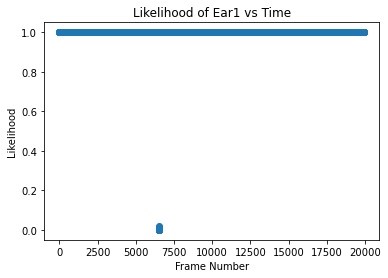

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=df1['Frames'],y=df1['Ear1.L'])
plt.title('Likelihood of Ear1 vs Time')
plt.xlabel("Frame Number")
plt.ylabel("Likelihood")
plt.show()

From Likelihood Analysis, setting all frames with some point with likelihood < 0.95 as NaN because occlusions happen

In [5]:
df1['outlier'] = pd.Series(0, index=df1.index)
import numpy as np
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df1[df1[y]<0.95].index.tolist():
        for z in df1.columns:
            if((z in list_likelihood)==False): 
                df1.loc[x, z] = np.nan
        df1.at[x,'outlier'] = 1
print(df1[df1['outlier'] == 1])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
3395      NaN     NaN     NaN  0.999997     NaN     NaN  0.999999     NaN   
3396      NaN     NaN     NaN  0.999997     NaN     NaN  1.000000     NaN   
3397      NaN     NaN     NaN  0.999999     NaN     NaN  1.000000     NaN   
3398      NaN     NaN     NaN  0.999999     NaN     NaN  1.000000     NaN   
3399      NaN     NaN     NaN  0.999996     NaN     NaN  1.000000     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
19080     NaN     NaN     NaN  0.999999     NaN     NaN  0.999999     NaN   
19083     NaN     NaN     NaN  0.999992     NaN     NaN  0.999999     NaN   
19085     NaN     NaN     NaN  0.999999     NaN     NaN  0.999999     NaN   
19138     NaN     NaN     NaN  0.999997     NaN     NaN  0.999997     NaN   
19143     NaN     NaN     NaN  1.000000     NaN     NaN  1.000000     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

In [6]:
df2['outlier'] = pd.Series(0, index=df2.index)
import numpy as np
list_likelihood = ['Ear1.L','Ear2.L','Ear3.L','Ear4.L','Ear5.L','Eye1.L','Eye2.L','Eye3.L','Eye4.L','SnoutMid.L','NoseTip.L','Mouth.L']
for y in list_likelihood:  
    for x in df2[df2[y]<0.95].index.tolist():
        for z in df2.columns:
            if((z in list_likelihood)==False): 
                df2.loc[x, z] = np.nan
        df2.at[x,'outlier'] = 1
print(df2[df2['outlier'] == 1])

       Frames  Ear1.X  Ear1.Y    Ear1.L  Ear2.X  Ear2.Y    Ear2.L  Ear3.X  \
12432     NaN     NaN     NaN  0.999989     NaN     NaN  0.999999     NaN   
12434     NaN     NaN     NaN  0.999985     NaN     NaN  0.999998     NaN   
12435     NaN     NaN     NaN  0.999985     NaN     NaN  0.999996     NaN   
12436     NaN     NaN     NaN  0.999975     NaN     NaN  0.999999     NaN   
12437     NaN     NaN     NaN  0.999974     NaN     NaN  0.999998     NaN   
...       ...     ...     ...       ...     ...     ...       ...     ...   
18204     NaN     NaN     NaN  0.999994     NaN     NaN  0.999999     NaN   
18205     NaN     NaN     NaN  0.999987     NaN     NaN  0.999998     NaN   
18208     NaN     NaN     NaN  0.999979     NaN     NaN  0.999996     NaN   
18212     NaN     NaN     NaN  0.999986     NaN     NaN  0.999997     NaN   
18215     NaN     NaN     NaN  0.999984     NaN     NaN  0.999995     NaN   

       Ear3.Y    Ear3.L  ...  SnoutMid.X  SnoutMid.Y  SnoutMid.L  NoseTip.X

Do these outlier frames from above happen during stimulus period???
Answer: 2 in total for both animals

In [8]:
list_start1=pd.read_csv('list_start11.csv', index_col = 0)
list_end1=pd.read_csv('list_end11.csv', index_col = 0)
print(list_start1)
print(list_end1)

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610
   laserHI  laserLO  laserCTRL   shock  shockCTRL   squeak  squeakCTRL
0   7502.0   7114.0     7768.0   733.0      987.0  15380.0     15623.0
1   8046.0   8528.0     8255.0  1179.0     1386.0  15795.0     15976.0
2   9121.0   9383.0     8798

In [9]:
list_start2=pd.read_csv('list_start12.csv', index_col = 0)
list_end2=pd.read_csv('list_end12.csv', index_col = 0)
print(list_start2)
print(list_end2)

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632
   laserHI  laserLO  laserCTRL   shock  shockCTRL   squeak  squeakCTRL
0   7928.0   8198.0     7642.0  1094.0      922.0  16646.0     16475.0
1   8819.0   8401.0     8647.0  1627.0     1409.0  17180.0     16952.0
2   9621.0   9103.0     9302

In [10]:
list_1 = df1[df1['outlier'] == 1].index.tolist()
sum_1 = 0
for x in list_1:
    for col in list_start1.columns:
        for row in list_start1.index:
            if(list_start1.at[row,col]<=x & x<=list_end1.at[row,col]):
                sum_1 = sum_1+1
print("Number of outlier frames during stimulus for animal_1 is " + str(sum_1))

Number of outlier frames during stimulus for animal_1 is 2


In [11]:
list_2 = df2[df2['outlier'] == 1].index.tolist()
sum_2 = 0
for y in list_2:
    for col in list_start2.columns:
        for row in list_start2.index:
            if(list_start2.at[row,col]<=y & y<=list_end2.at[row,col]):
                sum_2 = sum_2+1
print("Number of outlier frames during stimulus for animal_2 is " + str(sum_2))

Number of outlier frames during stimulus for animal_2 is 0


Extracting Outlier Frames with Method 'Jump'

In [12]:
import math
distances1 = pd.DataFrame(index=df1.index,columns=df1.columns)
for row in distances1.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=len(distances1.index)-1):
            distances1.iat[row,col] = math.sqrt(pow(df1.iat[row+1,col] - df1.iat[row,col],2) \
            + pow(df1.iat[row+1,col+1] - df1.iat[row,col+1],2))
distances1 = distances1.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances1.drop(distances1.tail(1).index,inplace=True)
print(distances1.head())

      Ear1.X Ear1.Y    Ear2.X Ear2.Y    Ear3.X Ear3.Y    Ear4.X Ear4.Y  \
0   0.508984    NaN   1.35043    NaN   1.10123    NaN  0.473239    NaN   
1  0.0823845    NaN  0.631712    NaN  0.614929    NaN  0.354257    NaN   
2   0.339066    NaN   0.42956    NaN  0.194723    NaN  0.114838    NaN   
3   0.342353    NaN  0.347282    NaN  0.244123    NaN   0.39766    NaN   
4   0.342866    NaN   1.01961    NaN  0.759644    NaN  0.475042    NaN   

      Ear5.X Ear5.Y  ...     Eye3.X Eye3.Y     Eye4.X Eye4.Y SnoutMid.X  \
0    0.83304    NaN  ...   0.825492    NaN   0.249431    NaN   0.535831   
1   0.238649    NaN  ...   0.699693    NaN    0.16933    NaN   0.550192   
2  0.0859529    NaN  ...  0.0950585    NaN   0.117004    NaN   0.209318   
3   0.498846    NaN  ...  0.0600568    NaN  0.0540956    NaN    1.03339   
4    0.47891    NaN  ...   0.193914    NaN   0.198143    NaN   0.503257   

  SnoutMid.Y NoseTip.X NoseTip.Y   Mouth.X Mouth.Y  
0        NaN   1.00538       NaN  0.584469     NaN 

In [13]:
import math
distances2 = pd.DataFrame(index=df2.index,columns=df2.columns)
for row in distances2.index:
    for col in [1,4,7,10,13,16,19,22,25,28,31,34]:
        if(row!=len(distances2.index)-1):
            distances2.iat[row,col] = math.sqrt(pow(df2.iat[row+1,col] - df2.iat[row,col],2) \
            + pow(df2.iat[row+1,col+1] - df2.iat[row,col+1],2))
distances2 = distances2.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
distances2.drop(distances2.tail(1).index,inplace=True)
print(distances2.head())

     Ear1.X Ear1.Y     Ear2.X Ear2.Y    Ear3.X Ear3.Y    Ear4.X Ear4.Y  \
0  0.111365    NaN   0.448336    NaN  0.425779    NaN  0.294125    NaN   
1  0.285828    NaN  0.0846854    NaN  0.135182    NaN   0.15581    NaN   
2  0.244204    NaN   0.252962    NaN  0.186307    NaN  0.149778    NaN   
3  0.260012    NaN   0.162221    NaN  0.131809    NaN  0.444806    NaN   
4   3.69528    NaN    4.74085    NaN   4.08298    NaN    1.5523    NaN   

      Ear5.X Ear5.Y  ...    Eye3.X Eye3.Y     Eye4.X Eye4.Y SnoutMid.X  \
0   0.696443    NaN  ...  0.140672    NaN  0.0905536    NaN   0.450648   
1   0.378244    NaN  ...  0.280077    NaN   0.356957    NaN   0.762393   
2  0.0879042    NaN  ...  0.169799    NaN   0.287803    NaN    0.45437   
3   0.692713    NaN  ...  0.192995    NaN   0.190734    NaN   0.424354   
4    1.31396    NaN  ...  0.298174    NaN     0.3575    NaN    4.11554   

  SnoutMid.Y NoseTip.X NoseTip.Y    Mouth.X Mouth.Y  
0        NaN  0.671648       NaN   0.171502     NaN  
1 

In [14]:
jump1 = pd.DataFrame(columns = distances1.columns)
for col in distances1.columns:
    list_outlier = []
    for row in distances1.index:            
        if(distances1.at[row,col] > 10):
            list_outlier.append(row)
    jump1[col] = pd.Series(list_outlier)
print(jump1.head())
print(jump1.shape)

<ipython-input-14-0857f453632a>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump1[col] = pd.Series(list_outlier)


   Ear1.X  Ear1.Y  Ear2.X  Ear2.Y  Ear3.X  Ear3.Y  Ear4.X  Ear4.Y  Ear5.X  \
0    1423     NaN     329     NaN     329     NaN    1829     NaN    1913   
1    6894     NaN     379     NaN     379     NaN    1913     NaN    6588   
2   11788     NaN     381     NaN     381     NaN    2097     NaN    6607   
3   12094     NaN     604     NaN     707     NaN    2996     NaN    6894   
4   13292     NaN     707     NaN     709     NaN    3446     NaN    7404   

   Ear5.Y  ...  Eye3.X  Eye3.Y  Eye4.X  Eye4.Y  SnoutMid.X  SnoutMid.Y  \
0     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
1     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
2     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
3     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
4     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   

   NoseTip.X  NoseTip.Y  Mouth.X  Mouth.Y  
0     1911.0        NaN      NaN      NaN  
1   

In [15]:
jump2 = pd.DataFrame(columns = distances2.columns)
for col in distances2.columns:
    list_outlier = []
    for row in distances2.index:            
        if(distances2.at[row,col] > 8):
            list_outlier.append(row)
    jump2[col] = pd.Series(list_outlier)
print(jump2.head())
print(jump2.shape)

<ipython-input-15-3d76863bde7c>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jump2[col] = pd.Series(list_outlier)


   Ear1.X  Ear1.Y  Ear2.X  Ear2.Y  Ear3.X  Ear3.Y  Ear4.X  Ear4.Y  Ear5.X  \
0      24     NaN      21     NaN      21     NaN     566     NaN    2026   
1    1289     NaN      24     NaN      24     NaN    1080     NaN    4016   
2    1303     NaN      46     NaN      46     NaN    8186     NaN    6477   
3    1381     NaN     224     NaN     224     NaN    8805     NaN    6522   
4    2352     NaN     422     NaN     317     NaN    8980     NaN    8193   

   Ear5.Y  ...  Eye3.X  Eye3.Y  Eye4.X  Eye4.Y  SnoutMid.X  SnoutMid.Y  \
0     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
1     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
2     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
3     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   
4     NaN  ...     NaN     NaN     NaN     NaN         NaN         NaN   

   NoseTip.X  NoseTip.Y  Mouth.X  Mouth.Y  
0         74        NaN      NaN      NaN  
1   

After Jump Algorithm and manual verification of frames with large jumping distances, only the nose points seem to be prone to outliers 

In [16]:
df1=df1.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
df1.head()
#df1.to_csv(r'OutputAnimal11.csv')

In [17]:
df2=df2.drop(columns=['Frames','Ear1.L', 'Ear2.L', 'Ear3.L', \
                    'Ear4.L', 'Ear5.L', 'Eye1.L', 'Eye2.L', 'Eye3.L',\
                    'Eye4.L', 'SnoutMid.L', 'NoseTip.L', 'Mouth.L','outlier'])
df2.head()
#df2.to_csv(r'OutputAnimal12.csv')

In [175]:
fps = 5.16
s_laser = 0.1
s_shock = 2
s_squeak = 2
list_before1 = pd.DataFrame(index=list_start1.index, columns=list_start1.columns)
list_before1['shock'] = list_start1['shock'] - (s_shock+3)*fps
list_before1['shockCTRL'] = list_start1['shockCTRL'] - (s_shock+3)*fps
list_before1['squeak'] = list_start1['squeak'] - (s_squeak+3)*fps
list_before1['squeakCTRL'] = list_start1['squeakCTRL'] - (s_squeak+3)*fps
list_before1['laserHI'] = list_start1['laserHI'] - (s_laser+3)*fps
list_before1['laserLO'] = list_start1['laserLO'] - (s_laser+3)*fps
list_before1['laserCTRL'] = list_start1['laserCTRL'] - (s_laser+3)*fps
list_before1 = list_before1.round()
print(list_before1)

   laserHI  laserLO  laserCTRL   shock  shockCTRL   squeak  squeakCTRL
0   7470.0   7082.0     7736.0   681.0      935.0  15328.0     15571.0
1   8014.0   8496.0     8223.0  1127.0     1334.0  15743.0     15924.0
2   9089.0   9351.0     8766.0  1801.0     1599.0  16153.0     16335.0
3   9965.0   9640.0    10216.0  2340.0     2122.0  16532.0     16703.0
4  10716.0  10939.0    10450.0  2573.0     2878.0  16988.0     17293.0
5  11510.0  11181.0    11771.0  3106.0     3309.0  17651.0     17459.0
6  12295.0  12077.0    12489.0  3884.0     3609.0  17828.0     17999.0
7  13132.0  13345.0    12775.0  4189.0     4484.0  18253.0     18512.0
8  13672.0  13957.0    14151.0  4992.0     4733.0  18812.0     18979.0
9  14780.0  14551.0    14323.0  5205.0     5443.0  19274.0     19584.0


In [176]:
fps = 5.16
s_laser = 0.1
s_shock = 2
s_squeak = 2
list_before2 = pd.DataFrame(index=list_start2.index, columns=list_start2.columns)
list_before2['shock'] = list_start2['shock'] - (s_shock+3)*fps
list_before2['shockCTRL'] = list_start2['shockCTRL'] - (s_shock+3)*fps
list_before2['squeak'] = list_start2['squeak'] - (s_squeak+3)*fps
list_before2['squeakCTRL'] = list_start2['squeakCTRL'] - (s_squeak+3)*fps
list_before2['laserHI'] = list_start2['laserHI'] - (s_laser+3)*fps
list_before2['laserLO'] = list_start2['laserLO'] - (s_laser+3)*fps
list_before2['laserCTRL'] = list_start2['laserCTRL'] - (s_laser+3)*fps
list_before2 = list_before2.round()
print(list_before2)

   laserHI  laserLO  laserCTRL   shock  shockCTRL   squeak  squeakCTRL
0   7896.0   8166.0     7610.0  1042.0      870.0  16594.0     16423.0
1   8787.0   8369.0     8615.0  1575.0     1357.0  17128.0     16900.0
2   9589.0   9071.0     9270.0  1923.0     1757.0  17538.0     17351.0
3   9842.0  10457.0    10163.0  2446.0     2141.0  17999.0     17833.0
4  10779.0  11329.0    11031.0  5983.0     2882.0  18222.0     18517.0
5  12147.0  11868.0    11608.0  3162.0     3478.0  19020.0     18735.0
6  12928.0  12505.0    12717.0  3954.0     3649.0  19564.0     19320.0
7  13856.0  13587.0    13153.0  4488.0     4188.0  19963.0     19771.0
8  14660.0  14349.0    14094.0  4913.0     4690.0  20425.0     20228.0
9  15119.0  15475.0    15751.0  5157.0     5333.0  20855.0     20606.0


In [177]:
# Prolonging the stimulus interval from 3 sec to 5 sec
list_end1 = list_end1 + 10
list_end2 = list_end2 + 10

 Analysis for Animal 1:

In [178]:
list=[]
for x in list_end1.columns:
    for y in list_end1.index:
        list.append(x+"_"+str(y))
df_mean_before1 = pd.DataFrame(columns=df1.columns, index=list)
for x in df1.columns:
    for y in list_start1.columns:
        for z in list_start1.index:
            df_mean_before1.at[str(y)+"_"+str(z),x] = df1.loc[list_before1.at[z,y]:list_start1.at[z,y],x].mean()
print(df_mean_before1)

               Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
laserHI_0     509.095  187.277  491.076  169.469   467.66  177.395  474.104   
laserHI_1     512.451  188.428  497.768   170.05  473.977  175.914  474.093   
laserHI_2     506.704  183.311   488.79  164.488  469.718  173.653  477.452   
laserHI_3     506.066   187.19  482.827  174.506  457.088   184.59  473.457   
laserHI_4     505.353  186.232  481.577  172.882  456.371  183.833  472.432   
...               ...      ...      ...      ...      ...      ...      ...   
squeakCTRL_5  506.128  187.288  486.234  171.104  461.614  180.737  472.158   
squeakCTRL_6  511.382  185.852  501.147  166.845  478.819  169.259  478.357   
squeakCTRL_7  511.449  185.837  500.968  167.193  478.245  169.607  478.652   
squeakCTRL_8  512.388   188.81  503.246  169.055  480.376  170.703  476.624   
squeakCTRL_9  510.052  187.855  498.049  169.169  475.145  172.609  474.665   

               Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3

In [19]:
# Face plotting function
import matplotlib.pyplot as plt
def plot(d,n,c):
    plt.scatter(x=d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X', 'Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X', 'SnoutMid.X', 'NoseTip.X', 'Mouth.X']], y=-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y', 'Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y', 'SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y']], color=c)
    plt.plot(d.loc[n, ['Ear1.X', 'Ear2.X', 'Ear3.X', \
                    'Ear4.X', 'Ear5.X','Ear1.X']],-d.loc[n, ['Ear1.Y', 'Ear2.Y', 'Ear3.Y', \
                    'Ear4.Y', 'Ear5.Y','Ear1.Y']], color=c)
    plt.plot(d.loc[n, ['Eye1.X', 'Eye2.X', 'Eye3.X',\
                    'Eye4.X','Eye1.X']],-d.loc[n, ['Eye1.Y', 'Eye2.Y', 'Eye3.Y',\
                    'Eye4.Y','Eye1.Y']], color=c)
    plt.plot(d.loc[n, ['SnoutMid.X', 'NoseTip.X', 'Mouth.X','SnoutMid.X']],-d.loc[n, ['SnoutMid.Y', 'NoseTip.Y', 'Mouth.Y','SnoutMid.Y']], color=c)
    plt.ylim(-255,-145)
plt.show()

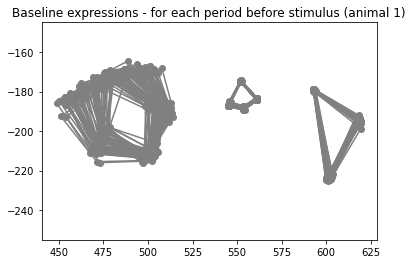

In [180]:
for y in list_start1.columns:
        for z in list_start1.index:
            plt.title('Baseline expressions - for each period before stimulus (animal 1)')
            plot(df_mean_before1, str(y)+"_"+str(z), 'gray')

#Euclidian Distance is not a good measure!!! Use Mahalanobis
for y in list_start1.columns:
        for z in list_start1.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start1.at[z,y]),int(list_end1.at[z,y]+1)):
                summ = 0
                for x in df1.columns:
                    summ = summ + pow(df_mean_before1.at[str(y)+"_"+str(z),x] - df1.at[frame,x],2)
                summ = math.sqrt(summ)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            print("For Stimulus " + str(y)+"_"+str(z) + "the frame with maximum expression is " + str(flag))
            plot(df_mean_before1, str(y)+"_"+str(z), 'gray')
            plot(df1, flag, 'red')
            plt.show()

The baseline for each stimulus with 3 seconds before changes very much!!!!!

In [182]:
print(list_before1.at[0, 'laserHI'])
print(list_start1.at[0, 'laserHI'])
print(list_end1.at[0, 'laserHI'])

7470.0
7486
7512.0


       Ear1.X      Ear1.Y      Ear2.X      Ear2.Y      Ear3.X      Ear3.Y  \
0  509.071462  187.661151  494.970041  168.260273  472.385791  176.238761   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  474.488706  202.592103  497.634954  214.014311  ...  544.408663   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  185.804842  552.140841  188.810942  593.226677  179.980468  618.793852   

    NoseTip.Y     Mouth.X    Mouth.Y  
0  194.964233  601.009348  223.53977  

[1 rows x 24 columns]


Text(0.5, 1.0, 'My Arbitrary Baseline - animal 1')

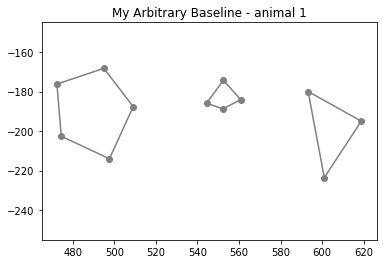

In [20]:
# Looked at the video and picked a 4 sec interval before any stimulus every happened that seemed at rest
my_baseline1 = pd.DataFrame(df1.loc[400:500,:].mean())
my_baseline1 = my_baseline1.T
print(my_baseline1)
plot(my_baseline1, 0, 'gray')
#my_baseline1.to_csv("BaselineExpression11.csv")
plt.title('My Arbitrary Baseline - animal 1')

For Stimulus laserHI_0the frame with maximum expression is 7495


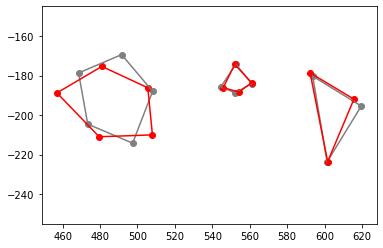

For Stimulus laserHI_1the frame with maximum expression is 8032


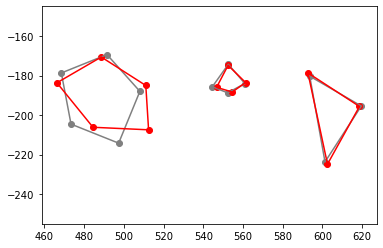

For Stimulus laserHI_2the frame with maximum expression is 9130


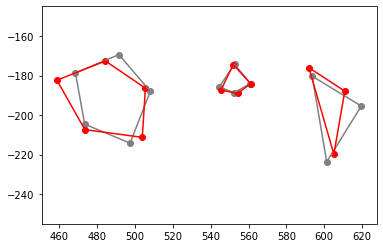

For Stimulus laserHI_3the frame with maximum expression is 9983


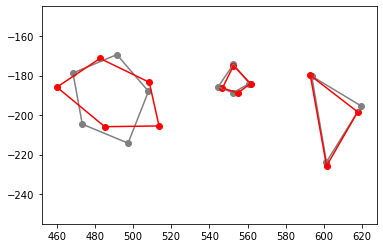

For Stimulus laserHI_4the frame with maximum expression is 10752


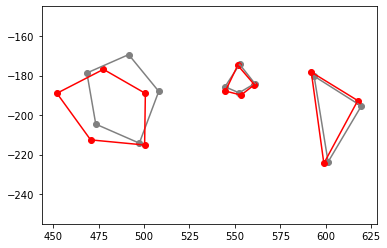

For Stimulus laserHI_5the frame with maximum expression is 11535


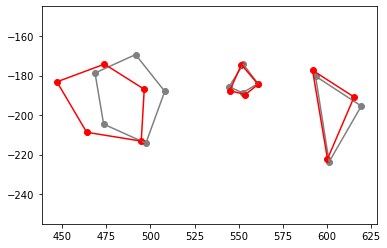

For Stimulus laserHI_6the frame with maximum expression is 12317


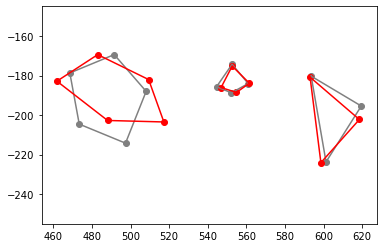

For Stimulus laserHI_7the frame with maximum expression is 13166


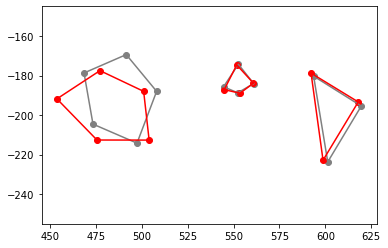

For Stimulus laserHI_8the frame with maximum expression is 13710


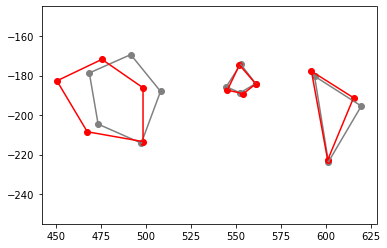

For Stimulus laserHI_9the frame with maximum expression is 14808


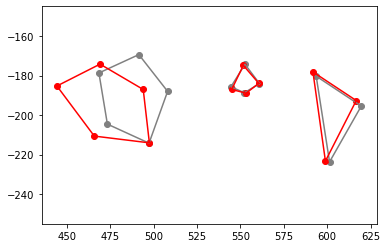

For Stimulus laserLO_0the frame with maximum expression is 7104


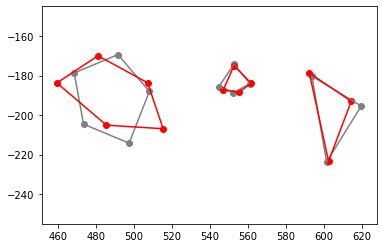

For Stimulus laserLO_1the frame with maximum expression is 8530


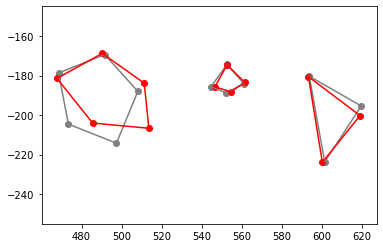

For Stimulus laserLO_2the frame with maximum expression is 9371


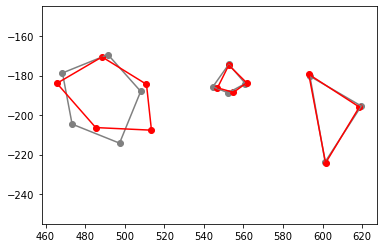

For Stimulus laserLO_3the frame with maximum expression is 9675


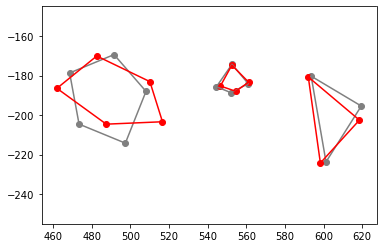

For Stimulus laserLO_4the frame with maximum expression is 10957


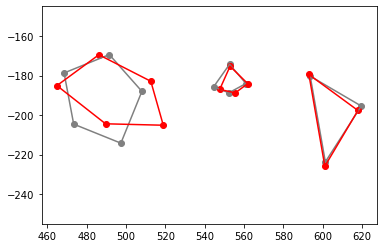

For Stimulus laserLO_5the frame with maximum expression is 11223


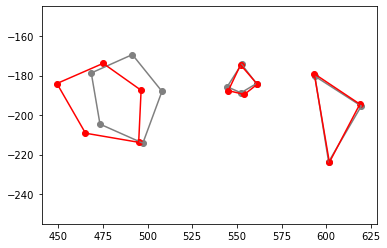

For Stimulus laserLO_6the frame with maximum expression is 12112


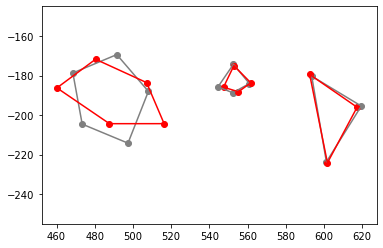

For Stimulus laserLO_7the frame with maximum expression is 13384


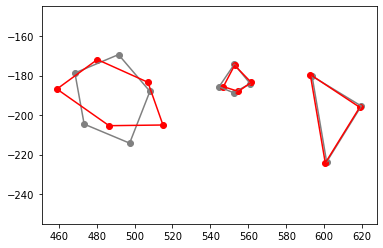

For Stimulus laserLO_8the frame with maximum expression is 13975


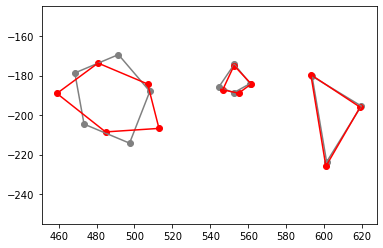

For Stimulus laserLO_9the frame with maximum expression is 14588


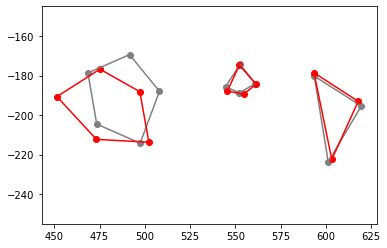

For Stimulus laserCTRL_0the frame with maximum expression is 7752


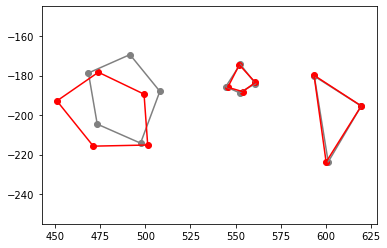

For Stimulus laserCTRL_1the frame with maximum expression is 8240


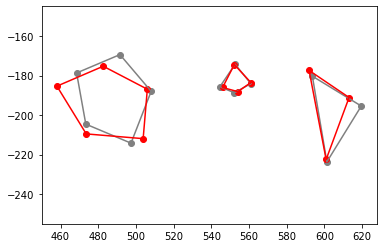

For Stimulus laserCTRL_2the frame with maximum expression is 8807


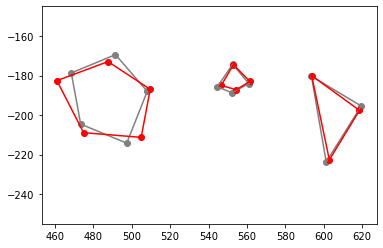

For Stimulus laserCTRL_3the frame with maximum expression is 10253


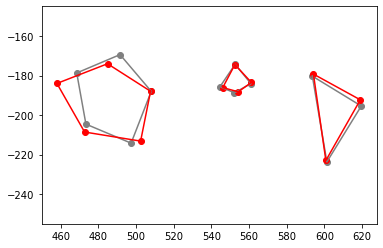

For Stimulus laserCTRL_4the frame with maximum expression is 10467


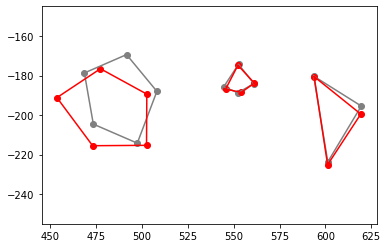

For Stimulus laserCTRL_5the frame with maximum expression is 11788


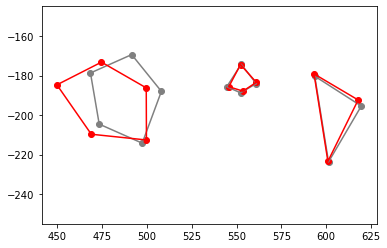

For Stimulus laserCTRL_6the frame with maximum expression is 12520


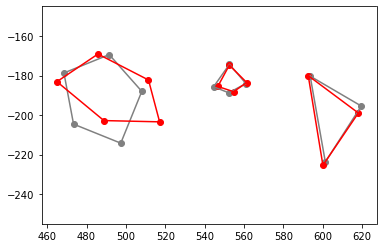

For Stimulus laserCTRL_7the frame with maximum expression is 12811


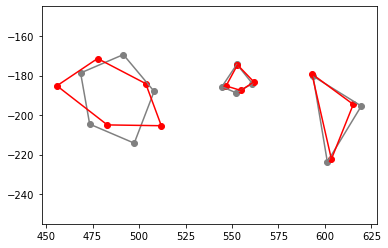

For Stimulus laserCTRL_8the frame with maximum expression is 14168


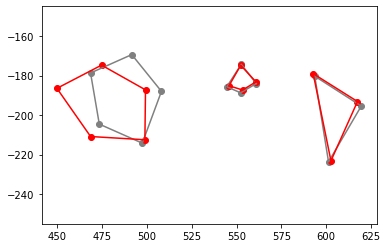

For Stimulus laserCTRL_9the frame with maximum expression is 14364


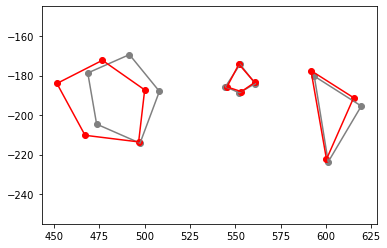

For Stimulus shock_0the frame with maximum expression is 712


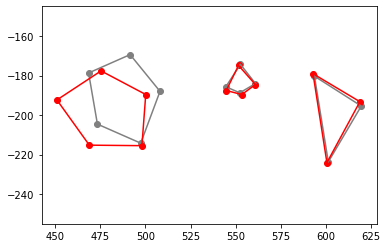

For Stimulus shock_1the frame with maximum expression is 1174


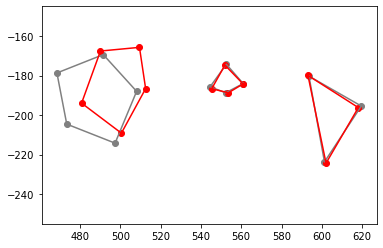

For Stimulus shock_2the frame with maximum expression is 1838


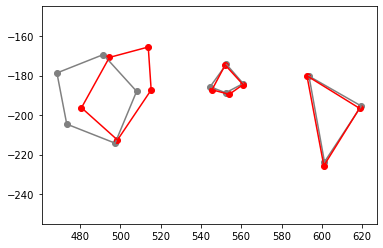

For Stimulus shock_3the frame with maximum expression is 2370


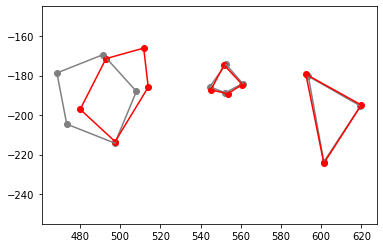

For Stimulus shock_4the frame with maximum expression is 2618


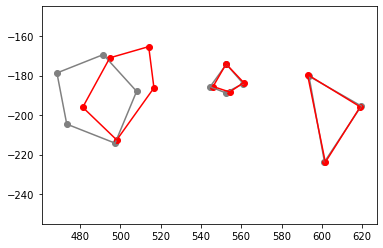

For Stimulus shock_5the frame with maximum expression is 3140


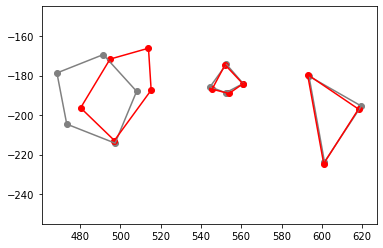

For Stimulus shock_6the frame with maximum expression is 3923


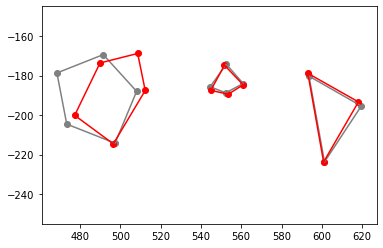

For Stimulus shock_7the frame with maximum expression is 4224


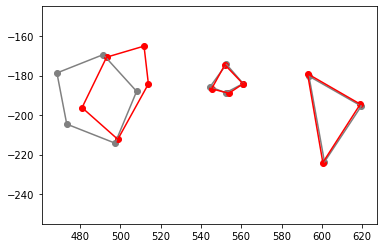

For Stimulus shock_8the frame with maximum expression is 5022


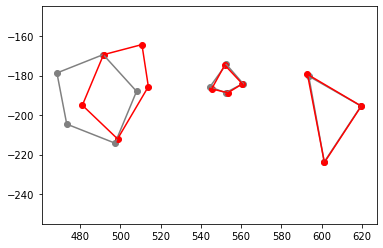

For Stimulus shock_9the frame with maximum expression is 5264


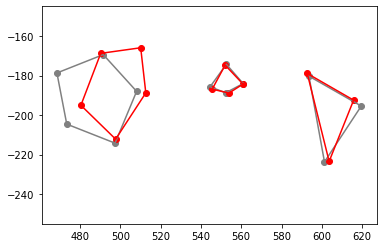

For Stimulus shockCTRL_0the frame with maximum expression is 975


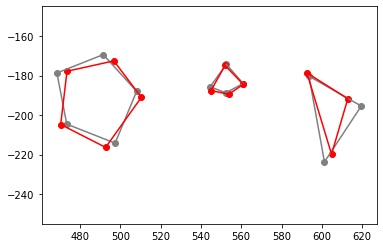

For Stimulus shockCTRL_1the frame with maximum expression is 1386


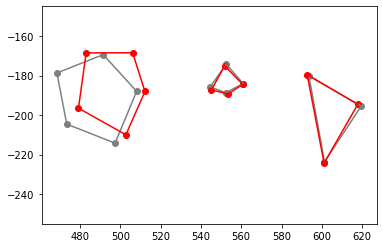

For Stimulus shockCTRL_2the frame with maximum expression is 1628


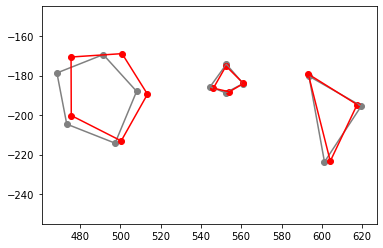

For Stimulus shockCTRL_3the frame with maximum expression is 2157


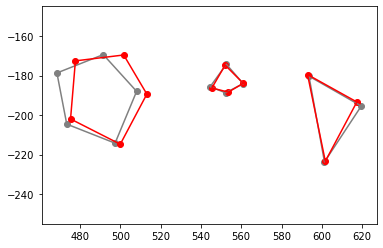

For Stimulus shockCTRL_4the frame with maximum expression is 2904


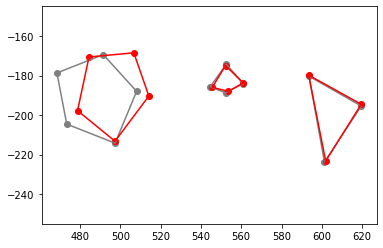

For Stimulus shockCTRL_5the frame with maximum expression is 3335


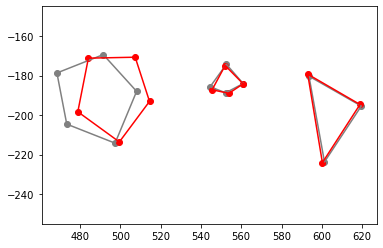

For Stimulus shockCTRL_6the frame with maximum expression is 3644


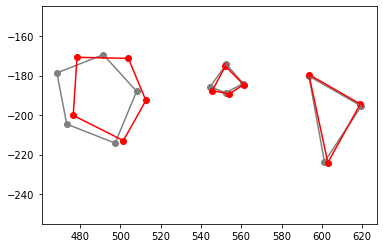

For Stimulus shockCTRL_7the frame with maximum expression is 4536


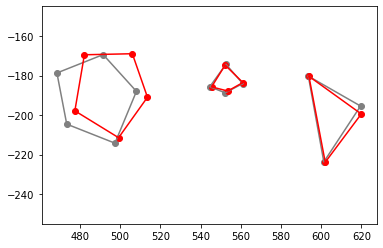

For Stimulus shockCTRL_8the frame with maximum expression is 4790


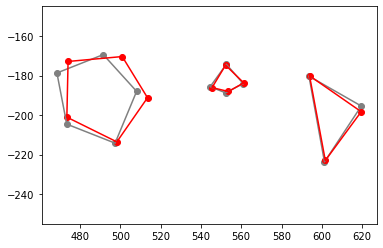

For Stimulus shockCTRL_9the frame with maximum expression is 5493


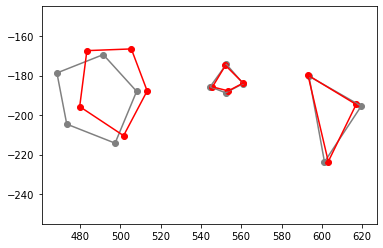

For Stimulus squeak_0the frame with maximum expression is 15369


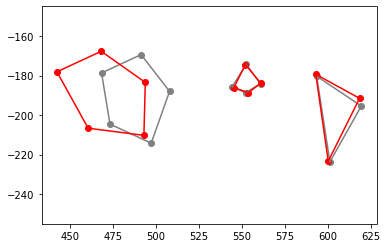

For Stimulus squeak_1the frame with maximum expression is 15772


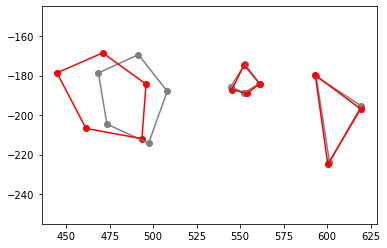

For Stimulus squeak_2the frame with maximum expression is 16185


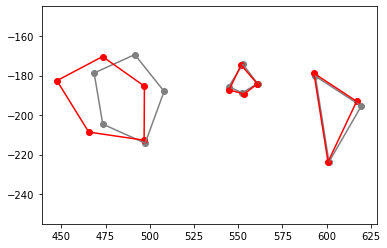

For Stimulus squeak_3the frame with maximum expression is 16579


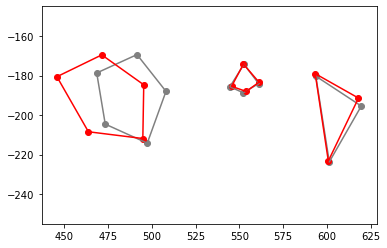

For Stimulus squeak_4the frame with maximum expression is 17014


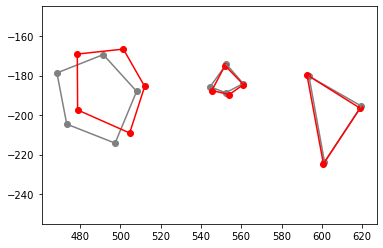

For Stimulus squeak_5the frame with maximum expression is 17713


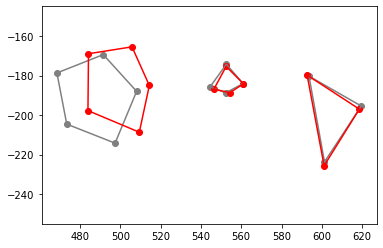

For Stimulus squeak_6the frame with maximum expression is 17854


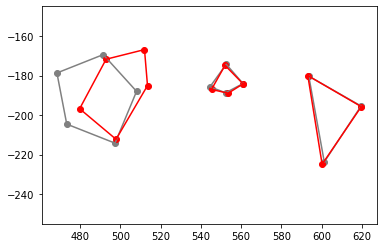

For Stimulus squeak_7the frame with maximum expression is 18309


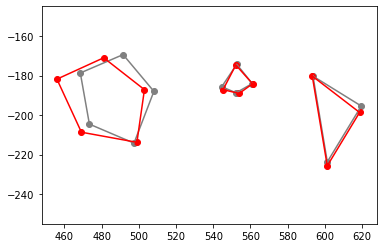

For Stimulus squeak_8the frame with maximum expression is 18839


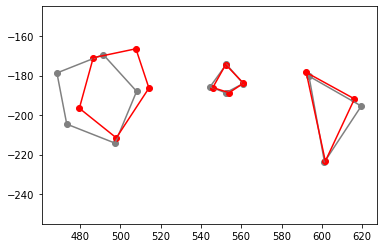

For Stimulus squeak_9the frame with maximum expression is 19314


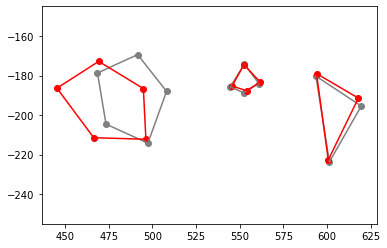

For Stimulus squeakCTRL_0the frame with maximum expression is 15606


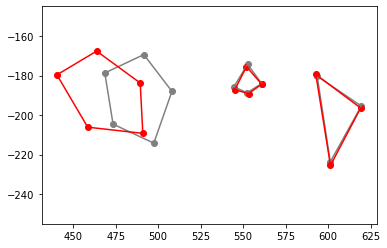

For Stimulus squeakCTRL_1the frame with maximum expression is 15954


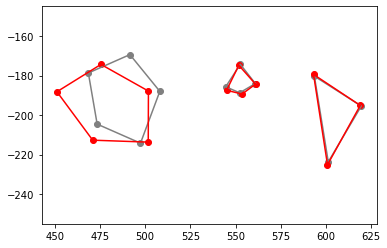

For Stimulus squeakCTRL_2the frame with maximum expression is 16371


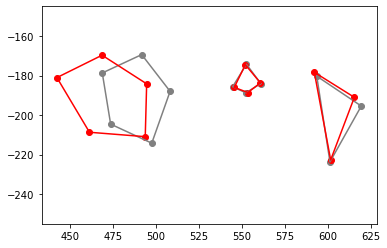

For Stimulus squeakCTRL_3the frame with maximum expression is 16757


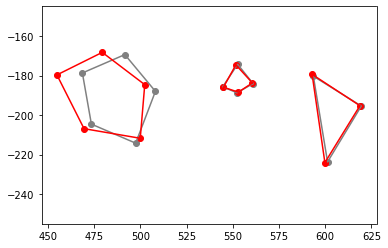

For Stimulus squeakCTRL_4the frame with maximum expression is 17322


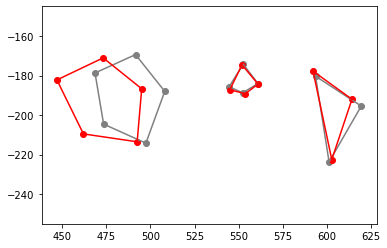

For Stimulus squeakCTRL_5the frame with maximum expression is 17493


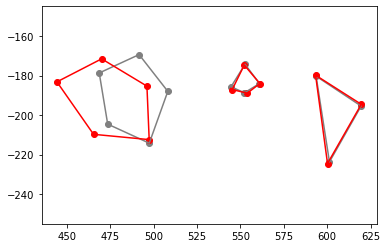

For Stimulus squeakCTRL_6the frame with maximum expression is 18047


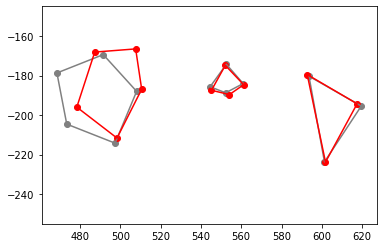

For Stimulus squeakCTRL_7the frame with maximum expression is 18558


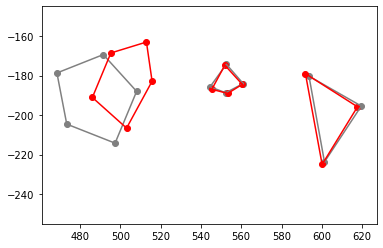

For Stimulus squeakCTRL_8the frame with maximum expression is 19012


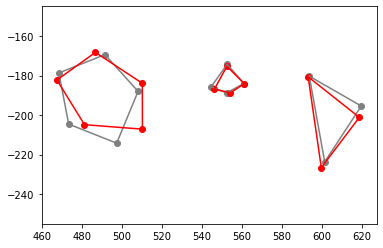

For Stimulus squeakCTRL_9the frame with maximum expression is 19620


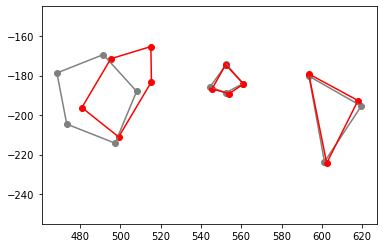

In [198]:
# Same analysis with my fixed baseline now
for y in list_start1.columns:
        for z in list_start1.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start1.at[z,y]),int(list_end1.at[z,y]+1)):
                summ = 0
                for x in df1.columns:
                    summ = summ + pow(my_baseline1.at[0,x] - df1.at[frame,x],2)
                summ = math.sqrt(summ)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            print("For Stimulus " + str(y)+"_"+str(z) + "the frame with maximum expression is " + str(flag))
            plot(my_baseline1, 0, 'gray')
            plot(df1, flag, 'red')
            plt.show()

In [185]:
print(list_before1.at[0, 'laserHI'])
print(list_start1.at[0, 'laserHI'])
print(list_end1.at[0, 'laserHI'])

7470.0
7486
7512.0


Analysis for Animal 2:

In [186]:
list=[]
for x in list_end2.columns:
    for y in list_end2.index:
        list.append(x+"_"+str(y))
df_mean_before2 = pd.DataFrame(columns=df2.columns, index=list)
for x in df2.columns:
    for y in list_start2.columns:
        for z in list_start2.index:
            df_mean_before2.at[str(y)+"_"+str(z),x] = df2.loc[list_before2.at[z,y]:list_start2.at[z,y],x].mean()
print(df_mean_before2)

               Ear1.X   Ear1.Y   Ear2.X   Ear2.Y   Ear3.X   Ear3.Y   Ear4.X  \
laserHI_0     505.447  191.247  488.524  177.109  466.547  185.954  474.959   
laserHI_1     503.688  191.676  485.796  177.467  463.748  187.193   475.09   
laserHI_2     506.923  192.251  490.729  177.415  469.928   185.93  476.907   
laserHI_3     503.522  193.108  485.922  179.561  464.863   189.45  475.797   
laserHI_4     508.052   192.15  493.042  176.718  472.714  184.874  476.688   
...               ...      ...      ...      ...      ...      ...      ...   
squeakCTRL_5  506.424  191.454  486.756  177.757  465.043    189.1  480.581   
squeakCTRL_6  509.981  192.648  494.313  178.714  474.462  187.638  481.977   
squeakCTRL_7  503.246   190.21  484.804  175.542  462.936  184.814  475.275   
squeakCTRL_8  509.751  189.665  495.984  174.092   475.68    181.3  480.777   
squeakCTRL_9  511.114  191.294  495.673    176.1  475.546  184.286  481.184   

               Ear4.Y   Ear5.X   Ear5.Y  ...   Eye3

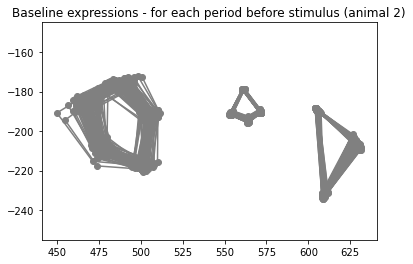

In [187]:
for y in list_start2.columns:
        for z in list_start2.index:
            plt.title('Baseline expressions - for each period before stimulus (animal 2)')
            plot(df_mean_before2, str(y)+"_"+str(z), 'gray')

For Stimulus laserHI_0the frame with maximum expression is 7938


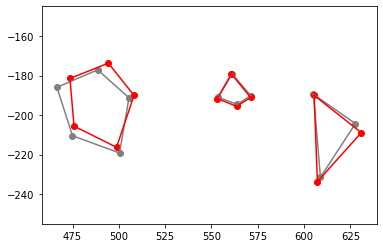

For Stimulus laserHI_1the frame with maximum expression is 8809


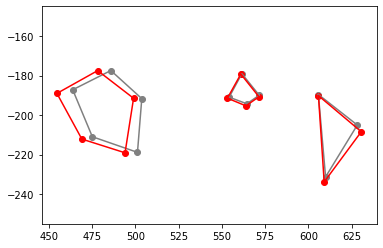

For Stimulus laserHI_2the frame with maximum expression is 9611


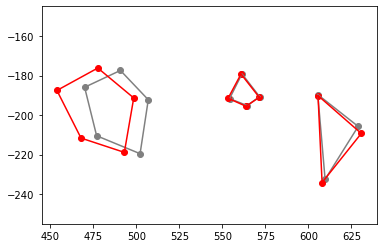

For Stimulus laserHI_3the frame with maximum expression is 9880


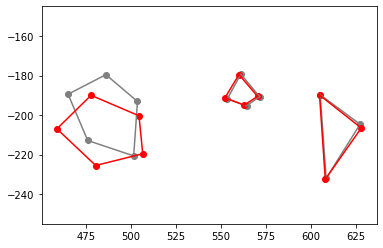

For Stimulus laserHI_4the frame with maximum expression is 10813


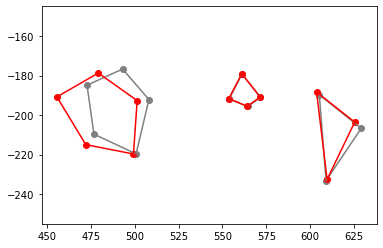

For Stimulus laserHI_5the frame with maximum expression is 12165


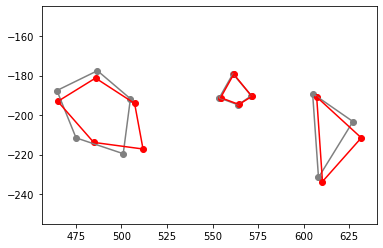

For Stimulus laserHI_6the frame with maximum expression is 12947


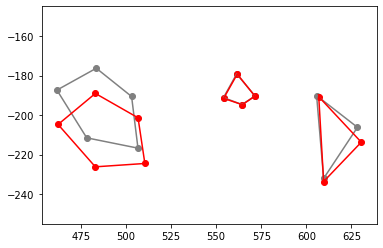

For Stimulus laserHI_7the frame with maximum expression is 13889


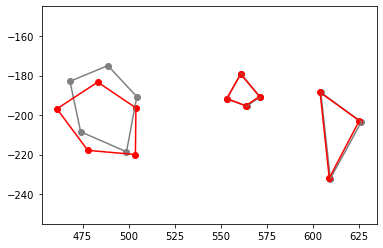

For Stimulus laserHI_8the frame with maximum expression is 14679


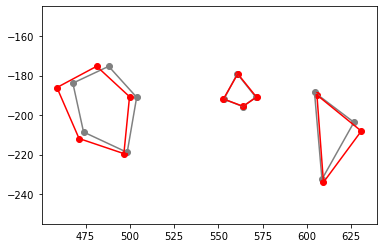

For Stimulus laserHI_9the frame with maximum expression is 15137


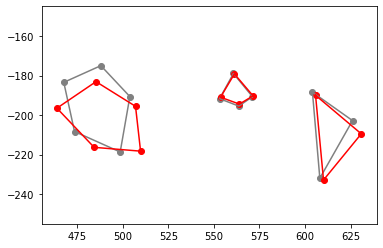

For Stimulus laserLO_0the frame with maximum expression is 8203


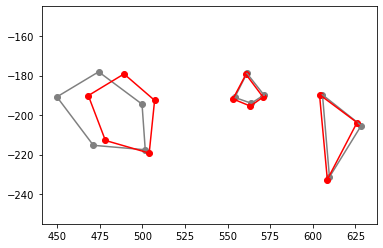

For Stimulus laserLO_1the frame with maximum expression is 8403


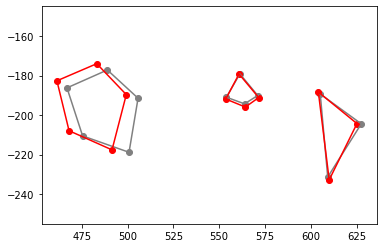

For Stimulus laserLO_2the frame with maximum expression is 9094


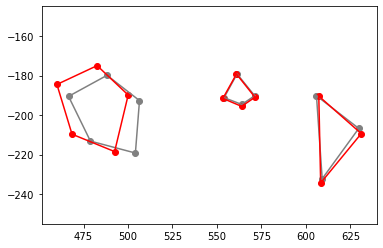

For Stimulus laserLO_3the frame with maximum expression is 10476


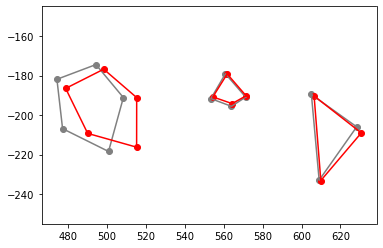

For Stimulus laserLO_4the frame with maximum expression is 11347


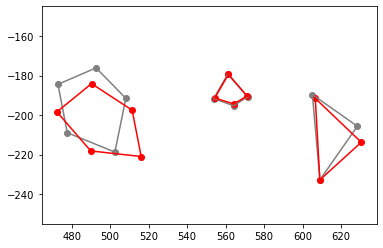

For Stimulus laserLO_5the frame with maximum expression is 11899


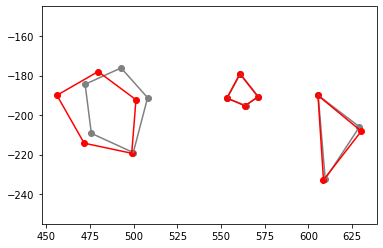

For Stimulus laserLO_6the frame with maximum expression is 12534


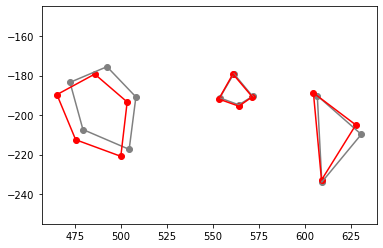

For Stimulus laserLO_7the frame with maximum expression is 13605


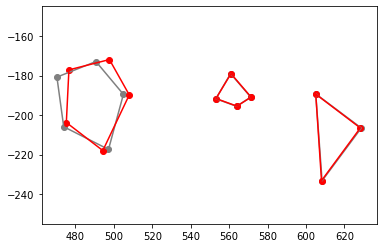

For Stimulus laserLO_8the frame with maximum expression is 14385


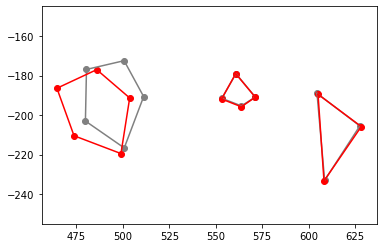

For Stimulus laserLO_9the frame with maximum expression is 15498


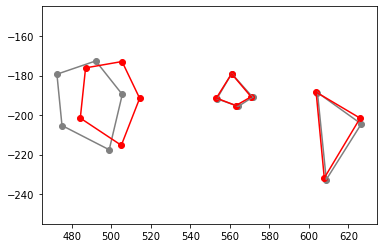

For Stimulus laserCTRL_0the frame with maximum expression is 7634


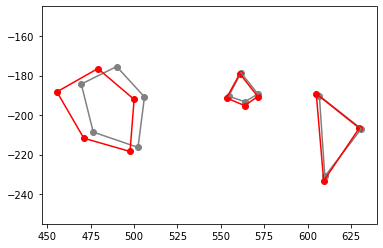

For Stimulus laserCTRL_1the frame with maximum expression is 8631


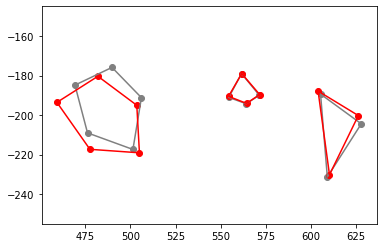

For Stimulus laserCTRL_2the frame with maximum expression is 9308


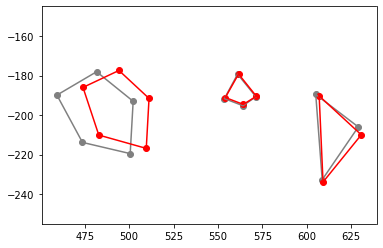

For Stimulus laserCTRL_3the frame with maximum expression is 10201


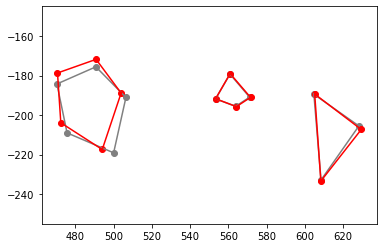

For Stimulus laserCTRL_4the frame with maximum expression is 11051


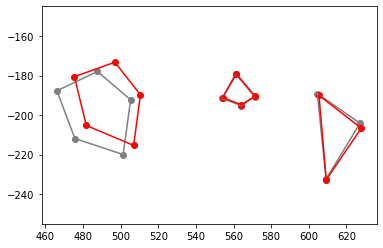

For Stimulus laserCTRL_5the frame with maximum expression is 11627


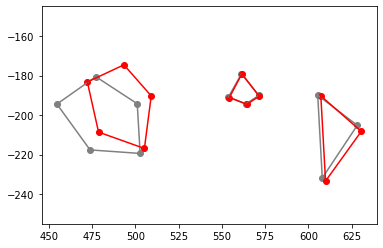

For Stimulus laserCTRL_6the frame with maximum expression is 12741


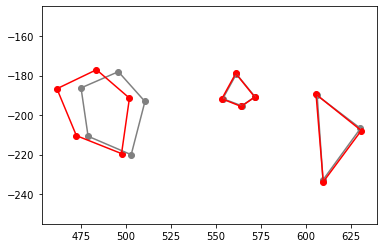

For Stimulus laserCTRL_7the frame with maximum expression is 13172


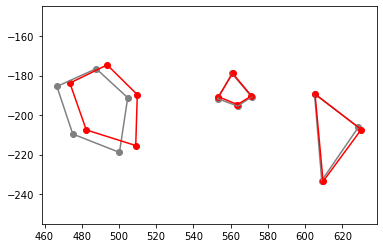

For Stimulus laserCTRL_8the frame with maximum expression is 14118


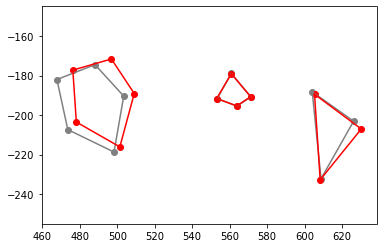

For Stimulus laserCTRL_9the frame with maximum expression is 15770


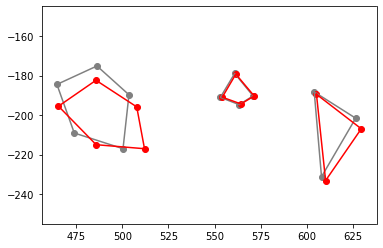

For Stimulus shock_0the frame with maximum expression is 1081


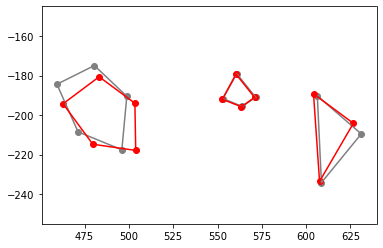

For Stimulus shock_1the frame with maximum expression is 1607


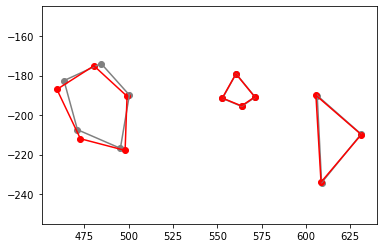

For Stimulus shock_2the frame with maximum expression is 1967


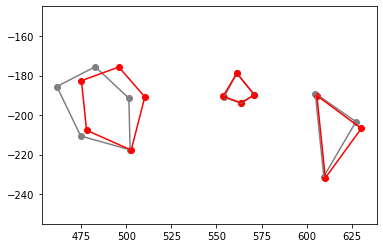

For Stimulus shock_3the frame with maximum expression is 2489


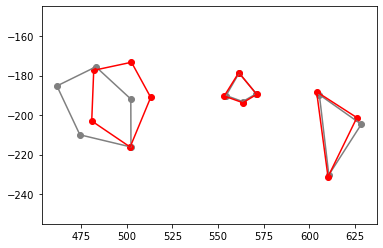

For Stimulus shock_4the frame with maximum expression is 6019


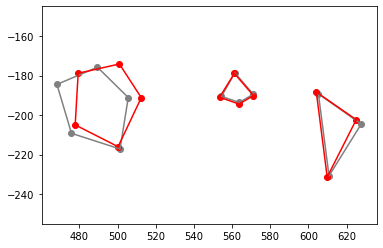

For Stimulus shock_5the frame with maximum expression is 3197


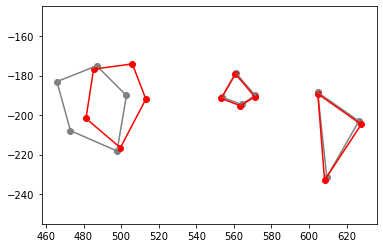

For Stimulus shock_6the frame with maximum expression is 3994


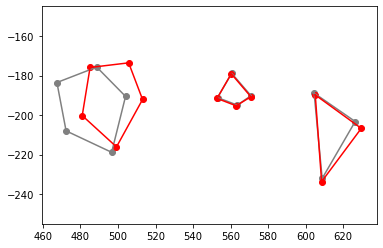

For Stimulus shock_7the frame with maximum expression is 4523


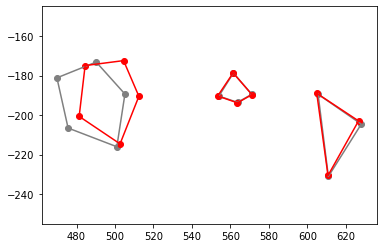

For Stimulus shock_8the frame with maximum expression is 4950


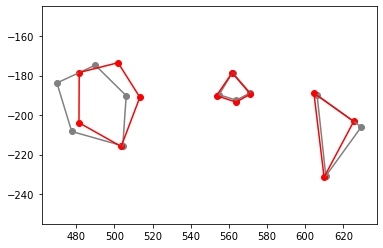

For Stimulus shock_9the frame with maximum expression is 5186


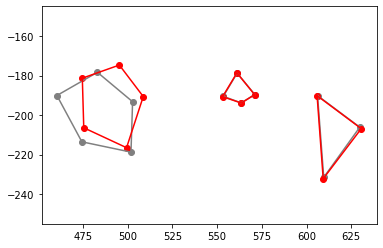

For Stimulus shockCTRL_0the frame with maximum expression is 902


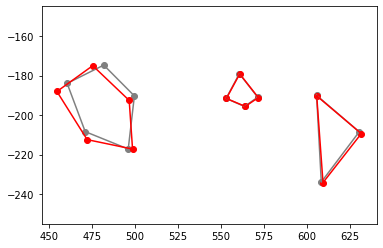

For Stimulus shockCTRL_1the frame with maximum expression is 1400


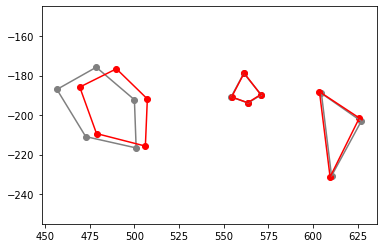

For Stimulus shockCTRL_2the frame with maximum expression is 1783


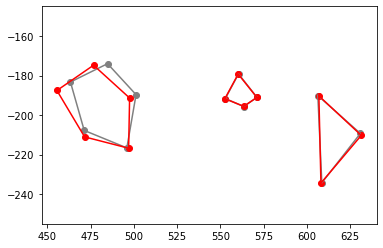

For Stimulus shockCTRL_3the frame with maximum expression is 2172


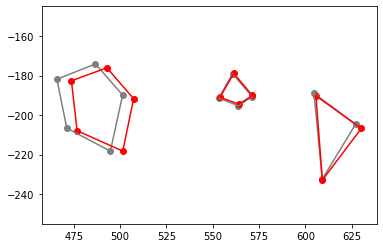

For Stimulus shockCTRL_4the frame with maximum expression is 2944


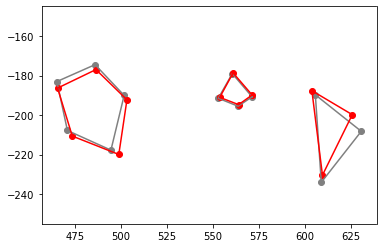

For Stimulus shockCTRL_5the frame with maximum expression is 3538


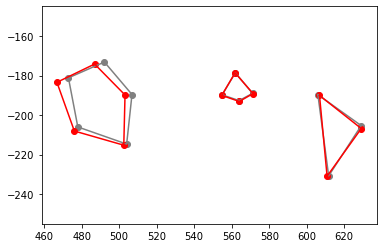

For Stimulus shockCTRL_6the frame with maximum expression is 3711


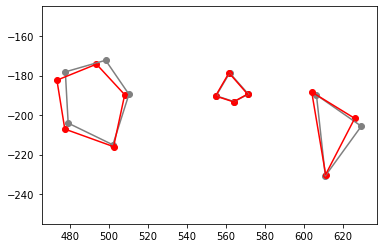

For Stimulus shockCTRL_7the frame with maximum expression is 4220


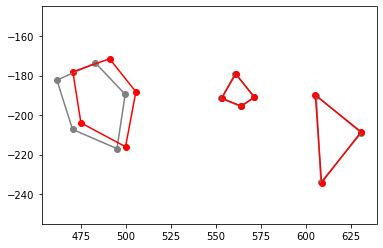

For Stimulus shockCTRL_8the frame with maximum expression is 4718


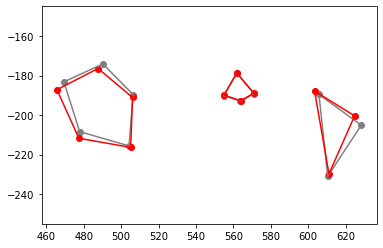

For Stimulus shockCTRL_9the frame with maximum expression is 5378


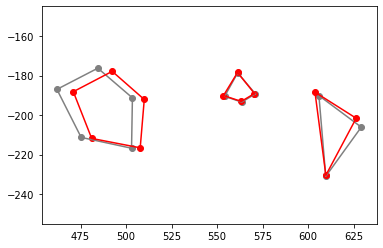

For Stimulus squeak_0the frame with maximum expression is 16631


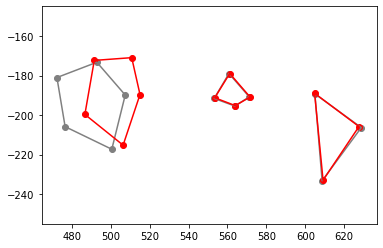

For Stimulus squeak_1the frame with maximum expression is 17176


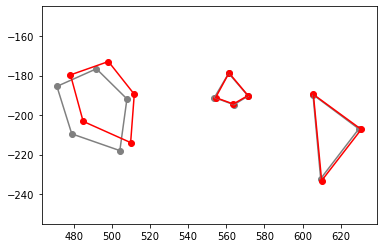

For Stimulus squeak_2the frame with maximum expression is 17568


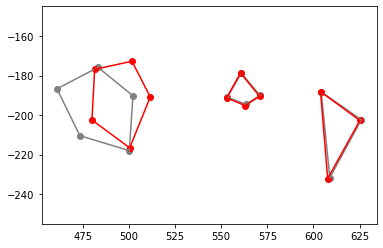

For Stimulus squeak_3the frame with maximum expression is 18036


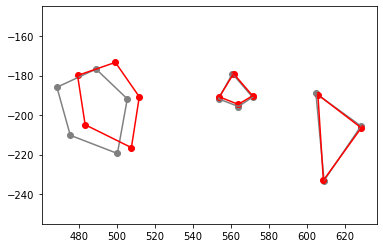

For Stimulus squeak_4the frame with maximum expression is 18271


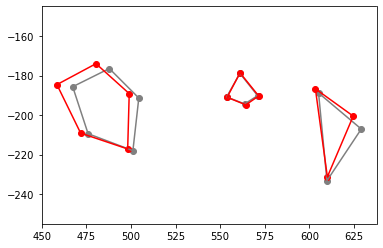

For Stimulus squeak_5the frame with maximum expression is 19068


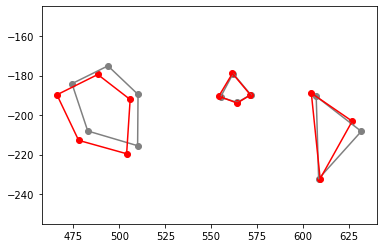

For Stimulus squeak_6the frame with maximum expression is 19620


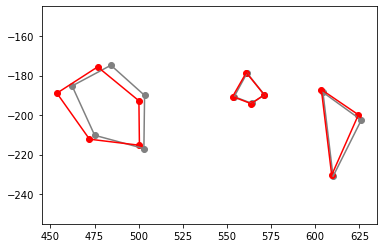

For Stimulus squeak_7the frame with maximum expression is 20010


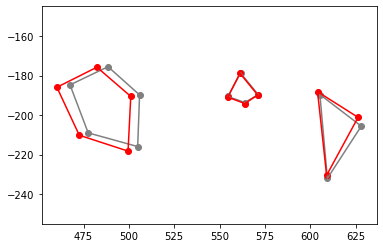

For Stimulus squeak_8the frame with maximum expression is 20455


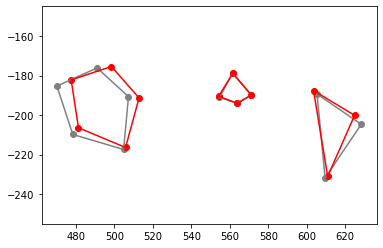

For Stimulus squeak_9the frame with maximum expression is 20894


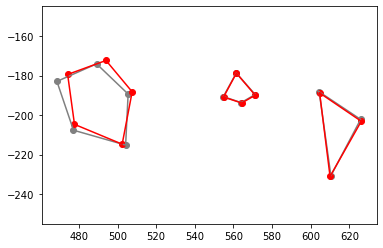

For Stimulus squeakCTRL_0the frame with maximum expression is 16457


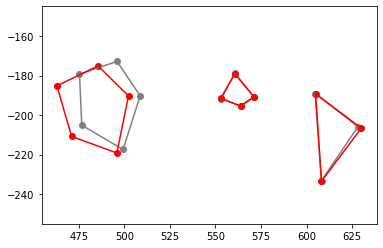

For Stimulus squeakCTRL_1the frame with maximum expression is 16953


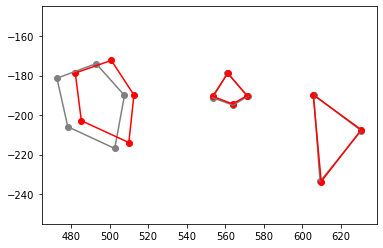

For Stimulus squeakCTRL_2the frame with maximum expression is 17388


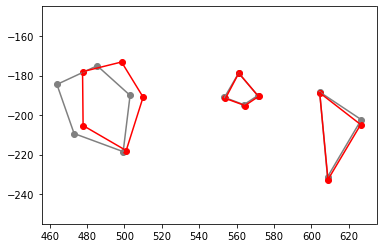

For Stimulus squeakCTRL_3the frame with maximum expression is 17888


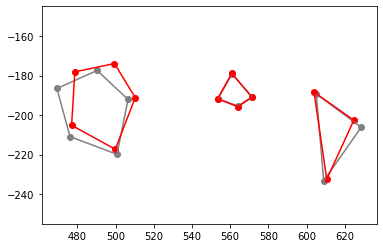

For Stimulus squeakCTRL_4the frame with maximum expression is 18561


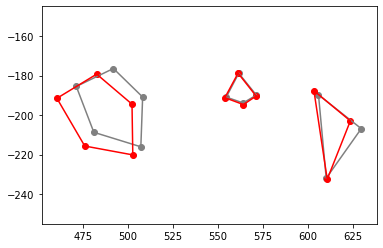

For Stimulus squeakCTRL_5the frame with maximum expression is 18795


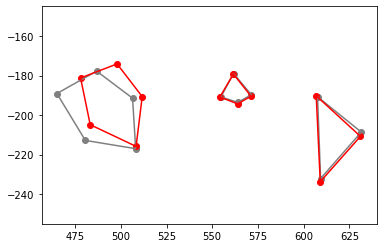

For Stimulus squeakCTRL_6the frame with maximum expression is 19361


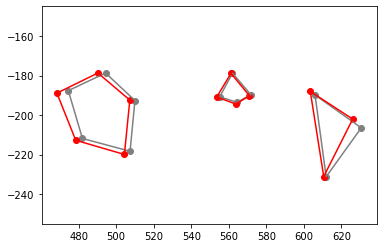

For Stimulus squeakCTRL_7the frame with maximum expression is 19832


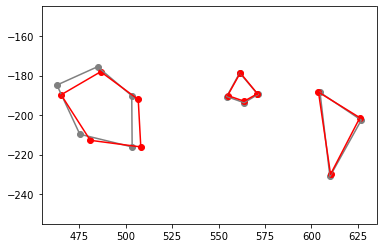

For Stimulus squeakCTRL_8the frame with maximum expression is 20276


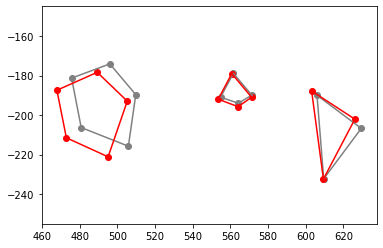

For Stimulus squeakCTRL_9the frame with maximum expression is 20640


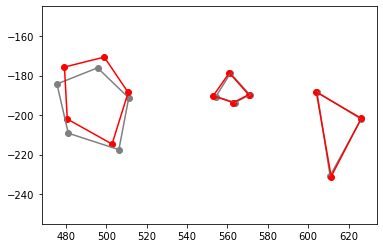

In [199]:
for y in list_start2.columns:
        for z in list_start2.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start2.at[z,y]),int(list_end2.at[z,y]+1)):
                summ = 0
                for x in df2.columns:
                    summ = summ + pow(df_mean_before2.at[str(y)+"_"+str(z),x] - df2.at[frame,x],2)
                summ = math.sqrt(summ)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            print("For Stimulus " + str(y)+"_"+str(z) + "the frame with maximum expression is " + str(flag))
            plot(df_mean_before2, str(y)+"_"+str(z), 'gray')
            plot(df2, flag, 'red')
            plt.show()

In [189]:
print(list_before2.at[0, 'laserHI'])
print(list_start2.at[0, 'laserHI'])
print(list_end2.at[0, 'laserHI'])

7896.0
7912
7938.0


       Ear1.X     Ear1.Y      Ear2.X      Ear2.Y      Ear3.X      Ear3.Y  \
0  508.007473  190.87755  490.411871  174.758761  467.985568  183.783594   

       Ear4.X      Ear4.Y      Ear5.X      Ear5.Y  ...      Eye3.X  \
0  476.711216  208.869924  502.168667  216.083167  ...  552.600204   

       Eye3.Y      Eye4.X      Eye4.Y  SnoutMid.X  SnoutMid.Y   NoseTip.X  \
0  190.518463  562.228251  193.540644  606.060121  189.790934  628.988206   

    NoseTip.Y     Mouth.X     Mouth.Y  
0  205.644262  610.152922  230.879466  

[1 rows x 24 columns]


Text(0.5, 1.0, 'My Arbitrary Baseline - animal 2')

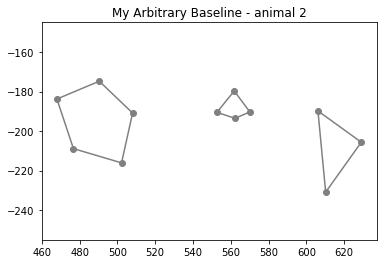

In [21]:
# Looked at the video and picked a 4 sec interval before any stimulus every happened that seemed at rest
my_baseline2 = pd.DataFrame(df2.loc[400:500,:].mean())
my_baseline2 = my_baseline2.T
print(my_baseline2)
plot(my_baseline2, 0, 'gray')
#my_baseline2.to_csv("BaselineExpression12.csv")
plt.title('My Arbitrary Baseline - animal 2')

For Stimulus laserHI_0the frame with maximum expression is 7920


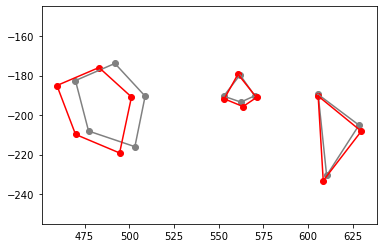

For Stimulus laserHI_1the frame with maximum expression is 8809


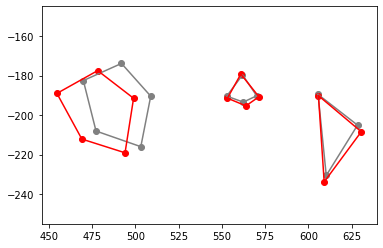

For Stimulus laserHI_2the frame with maximum expression is 9611


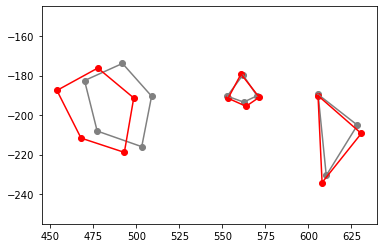

For Stimulus laserHI_3the frame with maximum expression is 9880


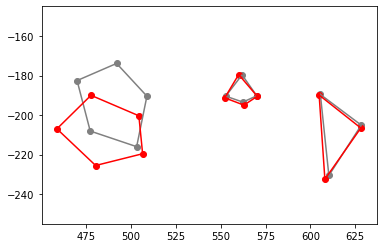

For Stimulus laserHI_4the frame with maximum expression is 10814


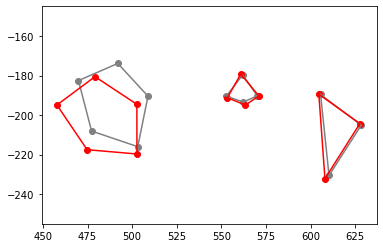

For Stimulus laserHI_5the frame with maximum expression is 12169


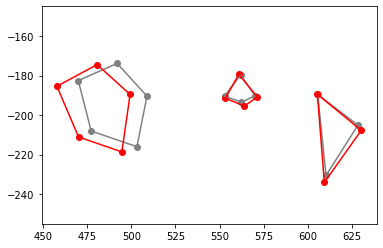

For Stimulus laserHI_6the frame with maximum expression is 12947


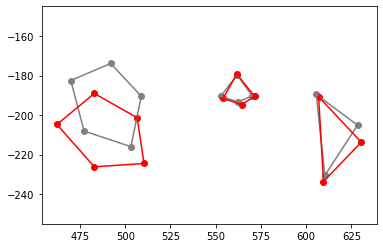

For Stimulus laserHI_7the frame with maximum expression is 13879


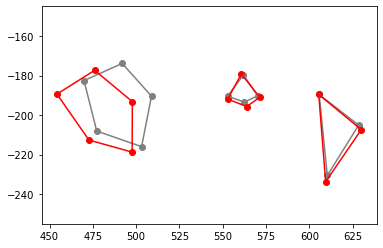

For Stimulus laserHI_8the frame with maximum expression is 14679


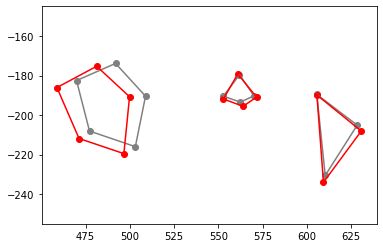

For Stimulus laserHI_9the frame with maximum expression is 15141


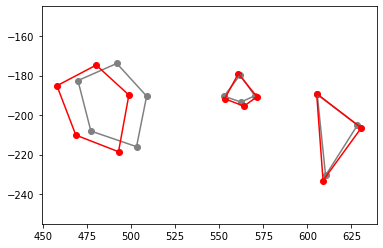

For Stimulus laserLO_0the frame with maximum expression is 8182


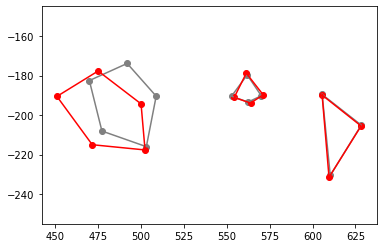

For Stimulus laserLO_1the frame with maximum expression is 8403


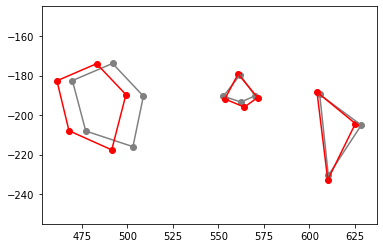

For Stimulus laserLO_2the frame with maximum expression is 9088


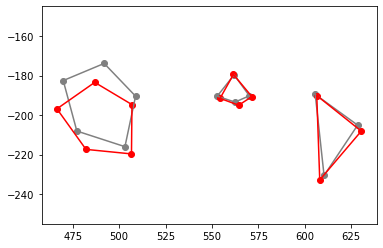

For Stimulus laserLO_3the frame with maximum expression is 10476


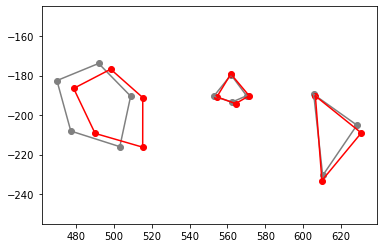

For Stimulus laserLO_4the frame with maximum expression is 11347


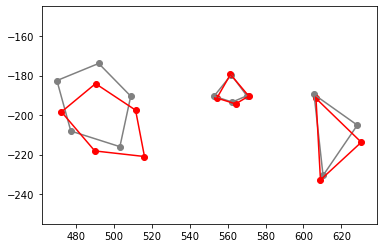

For Stimulus laserLO_5the frame with maximum expression is 11899


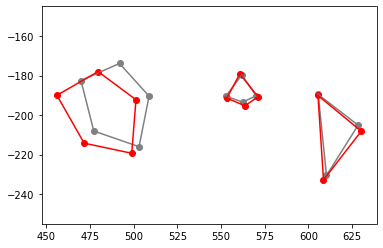

For Stimulus laserLO_6the frame with maximum expression is 12523


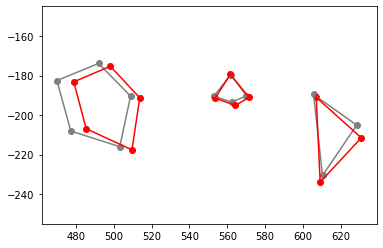

For Stimulus laserLO_7the frame with maximum expression is 13605


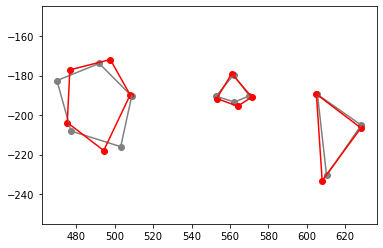

For Stimulus laserLO_8the frame with maximum expression is 14368


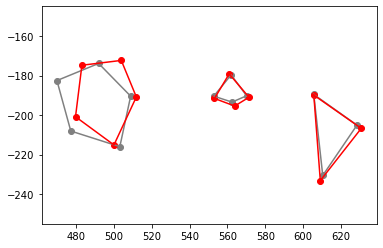

For Stimulus laserLO_9the frame with maximum expression is 15498


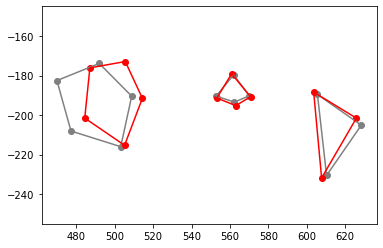

For Stimulus laserCTRL_0the frame with maximum expression is 7634


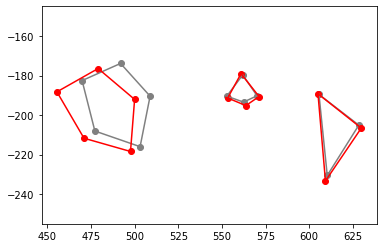

For Stimulus laserCTRL_1the frame with maximum expression is 8631


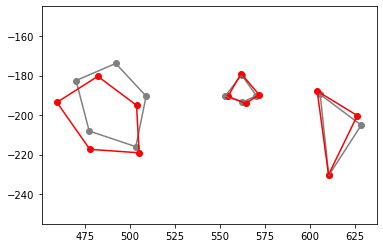

For Stimulus laserCTRL_2the frame with maximum expression is 9290


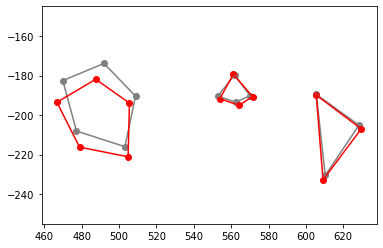

For Stimulus laserCTRL_3the frame with maximum expression is 10192


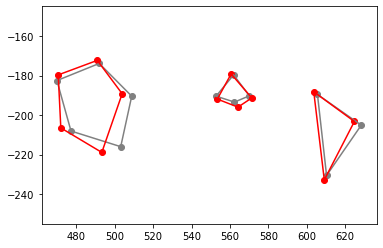

For Stimulus laserCTRL_4the frame with maximum expression is 11061


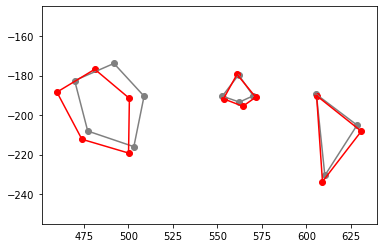

For Stimulus laserCTRL_5the frame with maximum expression is 11625


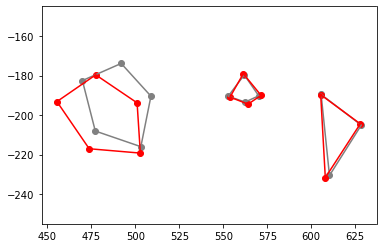

For Stimulus laserCTRL_6the frame with maximum expression is 12747


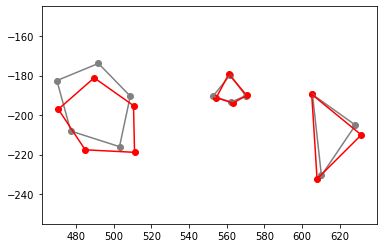

For Stimulus laserCTRL_7the frame with maximum expression is 13177


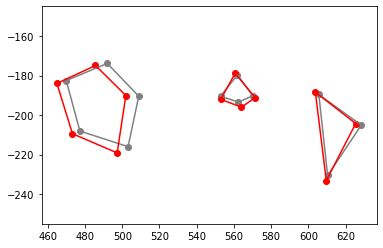

For Stimulus laserCTRL_8the frame with maximum expression is 14111


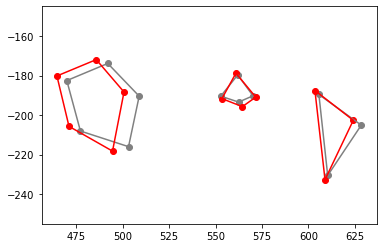

For Stimulus laserCTRL_9the frame with maximum expression is 15770


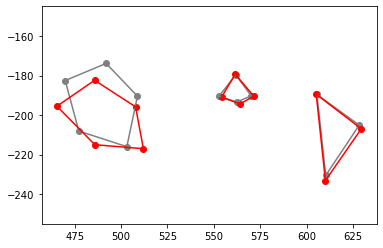

For Stimulus shock_0the frame with maximum expression is 1090


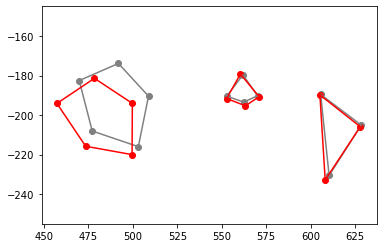

For Stimulus shock_1the frame with maximum expression is 1607


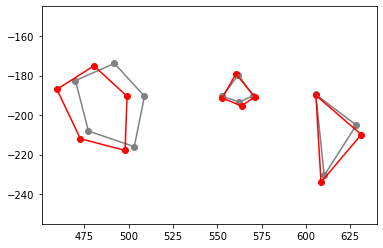

For Stimulus shock_2the frame with maximum expression is 1951


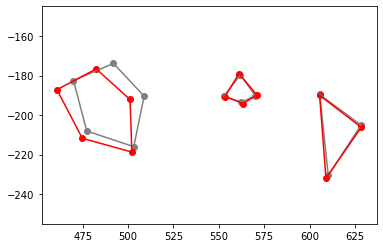

For Stimulus shock_3the frame with maximum expression is 2489


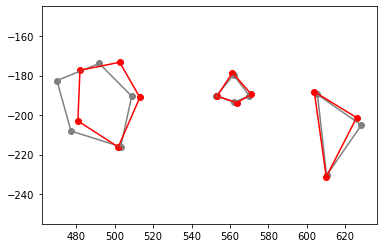

For Stimulus shock_4the frame with maximum expression is 6019


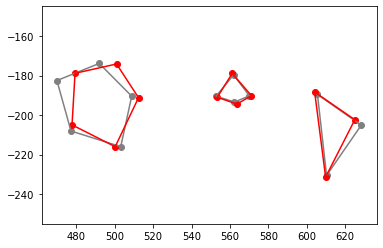

For Stimulus shock_5the frame with maximum expression is 3197


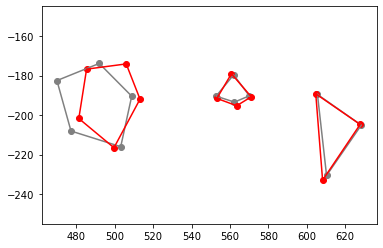

For Stimulus shock_6the frame with maximum expression is 3994


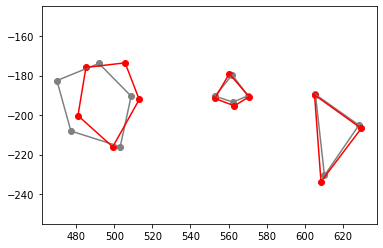

For Stimulus shock_7the frame with maximum expression is 4523


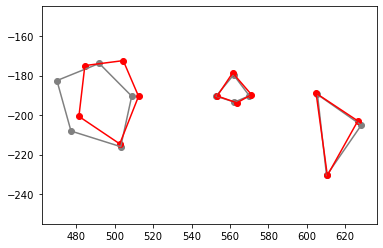

For Stimulus shock_8the frame with maximum expression is 4950


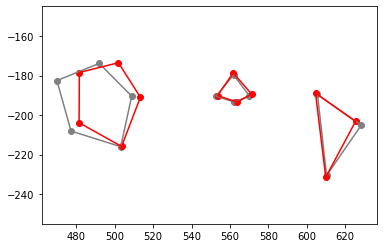

For Stimulus shock_9the frame with maximum expression is 5184


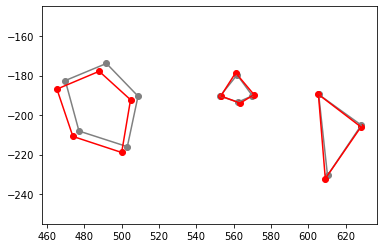

For Stimulus shockCTRL_0the frame with maximum expression is 902


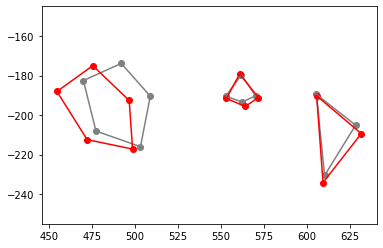

For Stimulus shockCTRL_1the frame with maximum expression is 1409


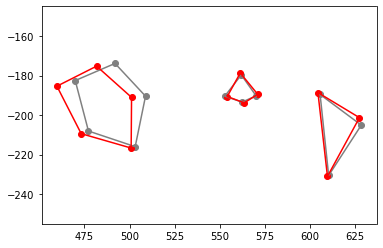

For Stimulus shockCTRL_2the frame with maximum expression is 1785


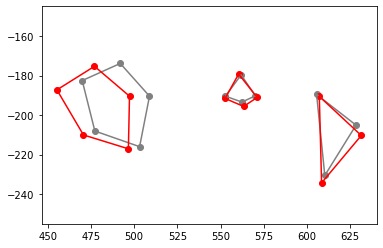

For Stimulus shockCTRL_3the frame with maximum expression is 2188


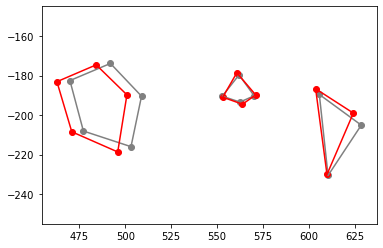

For Stimulus shockCTRL_4the frame with maximum expression is 2909


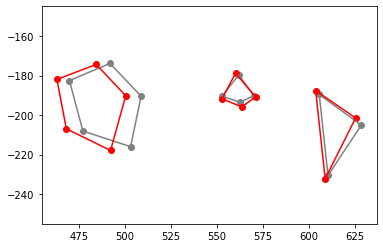

For Stimulus shockCTRL_5the frame with maximum expression is 3506


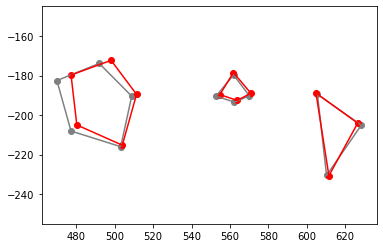

For Stimulus shockCTRL_6the frame with maximum expression is 3678


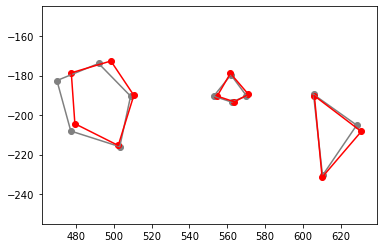

For Stimulus shockCTRL_7the frame with maximum expression is 4241


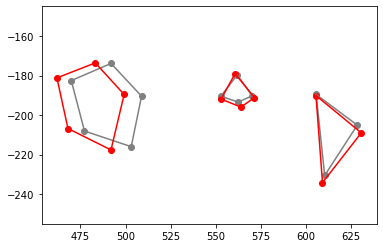

For Stimulus shockCTRL_8the frame with maximum expression is 4718


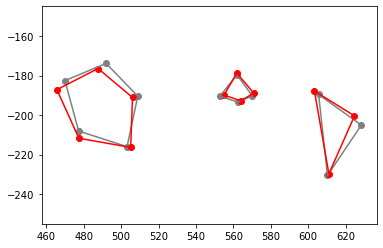

For Stimulus shockCTRL_9the frame with maximum expression is 5395


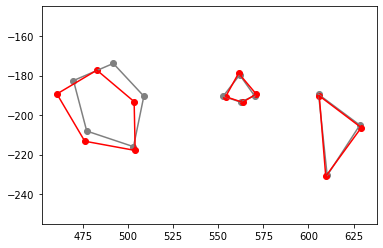

For Stimulus squeak_0the frame with maximum expression is 16631


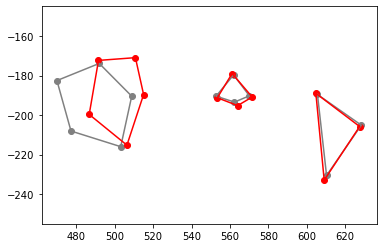

For Stimulus squeak_1the frame with maximum expression is 17176


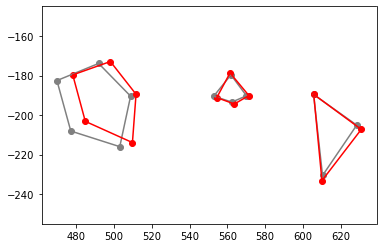

For Stimulus squeak_2the frame with maximum expression is 17564


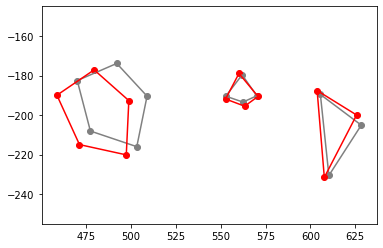

For Stimulus squeak_3the frame with maximum expression is 18026


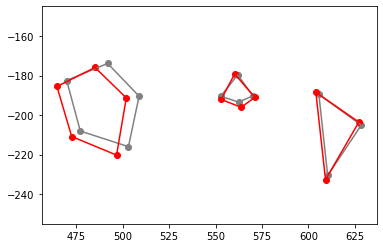

For Stimulus squeak_4the frame with maximum expression is 18275


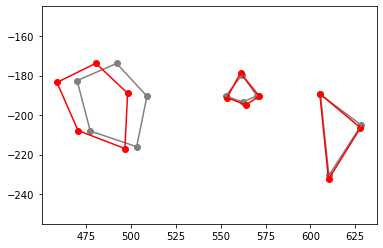

For Stimulus squeak_5the frame with maximum expression is 19050


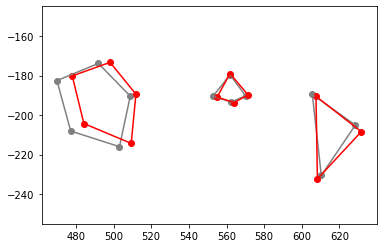

For Stimulus squeak_6the frame with maximum expression is 19620


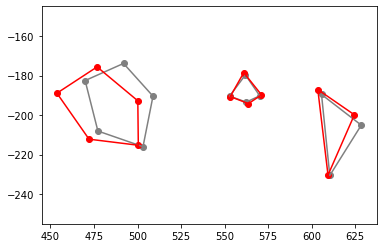

For Stimulus squeak_7the frame with maximum expression is 20010


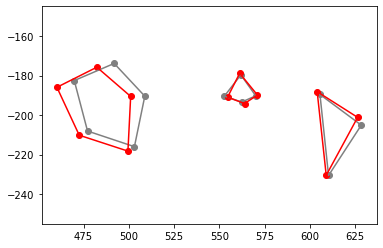

For Stimulus squeak_8the frame with maximum expression is 20455


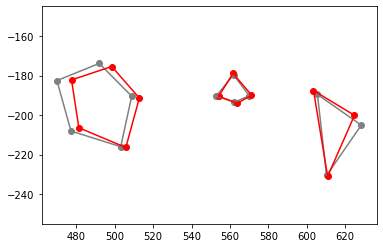

For Stimulus squeak_9the frame with maximum expression is 20881


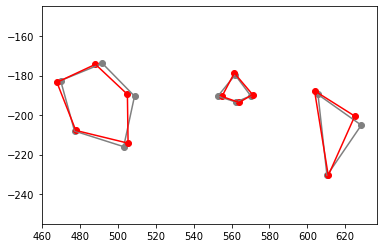

For Stimulus squeakCTRL_0the frame with maximum expression is 16470


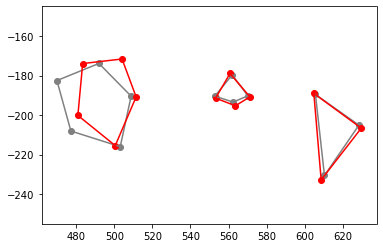

For Stimulus squeakCTRL_1the frame with maximum expression is 16953


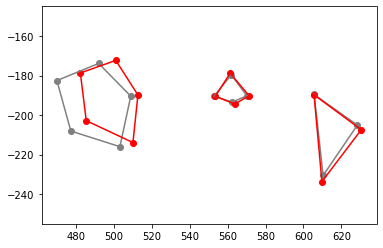

For Stimulus squeakCTRL_2the frame with maximum expression is 17377


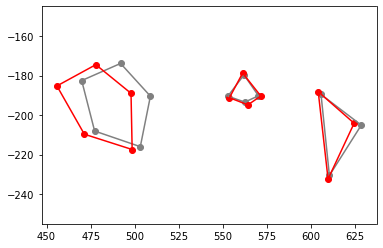

For Stimulus squeakCTRL_3the frame with maximum expression is 17878


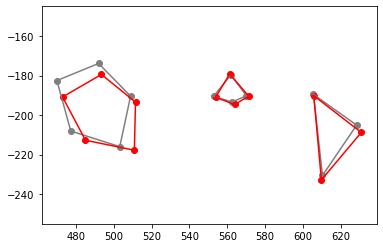

For Stimulus squeakCTRL_4the frame with maximum expression is 18567


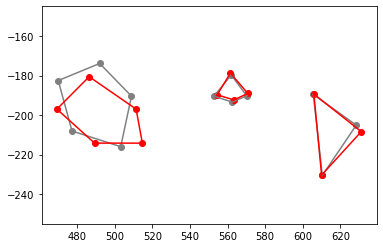

For Stimulus squeakCTRL_5the frame with maximum expression is 18773


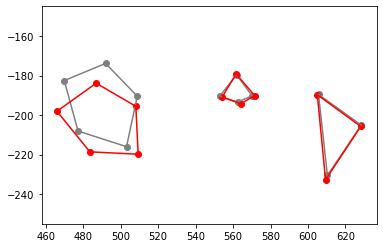

For Stimulus squeakCTRL_6the frame with maximum expression is 19361


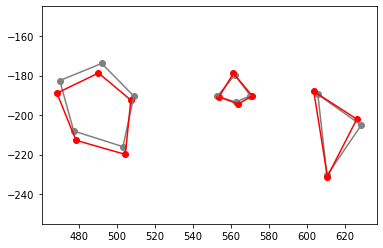

For Stimulus squeakCTRL_7the frame with maximum expression is 19824


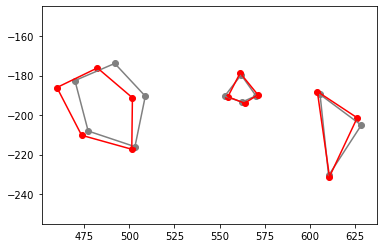

For Stimulus squeakCTRL_8the frame with maximum expression is 20276


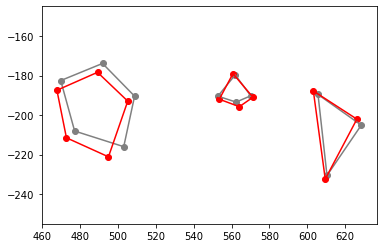

For Stimulus squeakCTRL_9the frame with maximum expression is 20640


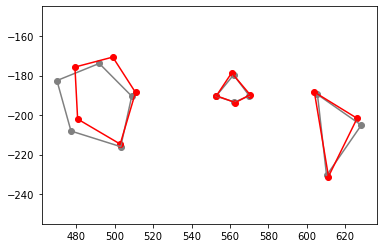

In [200]:
# Same analysis with my fixed baseline now
for y in list_start2.columns:
        for z in list_start2.index:
            maxx = 0
            flag = 0
            for frame in range(int(list_start2.at[z,y]),int(list_end2.at[z,y]+1)):
                summ = 0
                for x in df2.columns:
                    summ = summ + pow(my_baseline2.at[0,x] - df2.at[frame,x],2)
                summ = math.sqrt(summ)
                if(summ > maxx):
                    maxx = summ
                    flag = frame
            print("For Stimulus " + str(y)+"_"+str(z) + "the frame with maximum expression is " + str(flag))
            plot(my_baseline2, 0, 'gray')
            plot(df2, flag, 'red')
            plt.show()

In [192]:
print(list_before2.at[3, 'laserHI'])
print(list_start2.at[3, 'laserHI'])
print(list_end2.at[3, 'laserHI'])

9842.0
9858
9884.0
